# Prep for Pseudotime

In [1]:
source("/home/ridvan/scRIPT/settings.R")
source("/home/ridvan/scRIPT/utils.R")

In [2]:
BPPARAM <- BiocParallel::bpparam()
BPPARAM$workers = 30

# Multi core using future - built in to seurat
plan("multicore", workers = 30)
options(future.globals.maxSize = 300 * 1024 ^ 3) # for 300 Gb RAM

getwd()

[1] "/home/ridvan/PhD_Projects/CMO/Bioinformatic_Analysis/step13_pseudotime"

In [3]:
atlas <- readRDS(paste0(io$output_rds_dir, 'extended_atlas_cellranger_features_seurat.rds'))

In [4]:
atlas

An object of class Seurat 
27669 features across 430339 samples within 1 assay 
Active assay: originalexp (27669 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: UMAP, PCA

In [5]:
obj <- readRDS('../../cmo_version3.rds')
obj

An object of class Seurat 
27998 features across 71107 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: OLDPCA, OLDUMAP, OLDTSNE, PCA, UMAP, UMAP3D

In [7]:
table(obj$Conditions_lv)


 Control   Atf3KO  Bcl6bKO Zfp711KO 
   18366    16404    18948    17389 

In [8]:
Control <- subset(obj, subset = Conditions_lv %in% 'Control')
Control

An object of class Seurat 
27998 features across 18366 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: OLDPCA, OLDUMAP, OLDTSNE, PCA, UMAP, UMAP3D

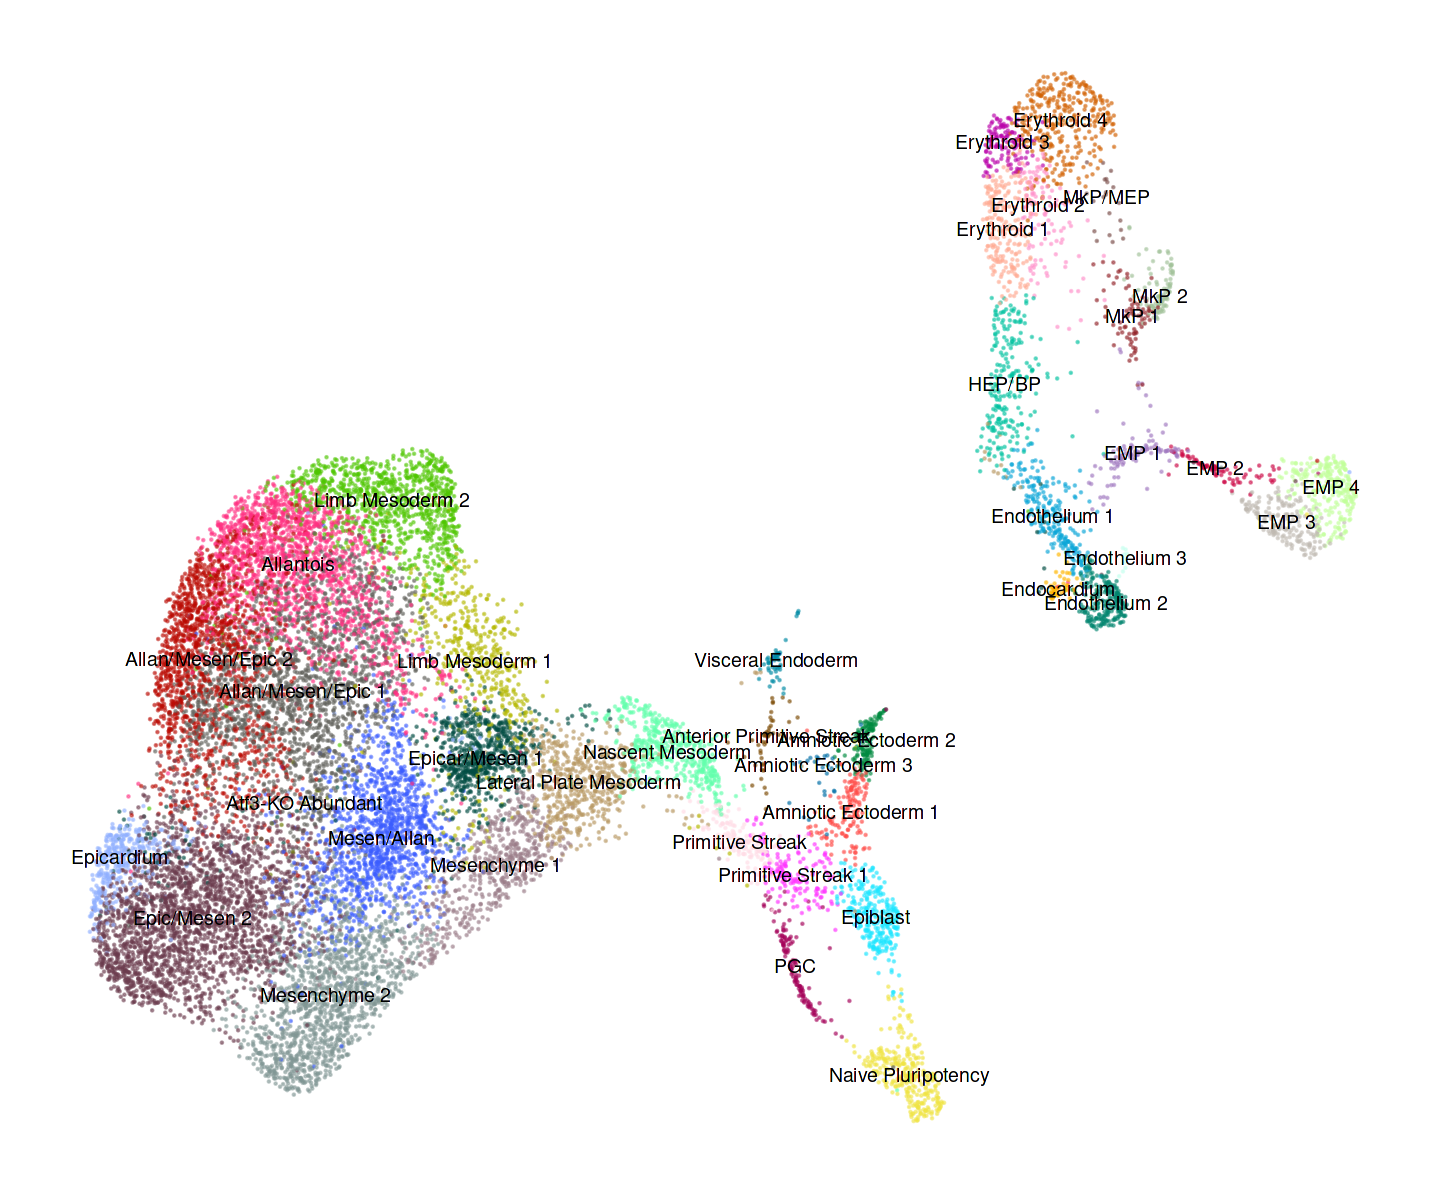

In [13]:
options(repr.plot.width = 12, repr.plot.height = 10)
DimPlot(Control, reduction = "UMAP", group.by = 'cell_type_subclusters',label = TRUE,cols = r3dcol$cols_94, alpha = 0.5)+ NoAxes()+NoLegend() + theme(plot.title = element_blank())


In [ ]:
ends <- c("EMP 4", "MkP 2", "Erythroid 4", "Endothelium 2", "Limb Mesoderm 2", "Allantois", "Epicardium", "Mesenchyme 2" )

In [14]:
p <- DimPlot(Control, reduction = "UMAP", group.by = 'cell_type_subclusters',label = TRUE,cols = r3dcol$cols_94, alpha = 0.5)+ NoAxes()+NoLegend() + theme(plot.title = element_blank())


Listening on http://127.0.0.1:5832



[1] "TAAGTCGTCCTCTGCA-1_1" "TTCTAGTAGTTGGAGC-1_1" "ATCTCTACAGAGGAAA-1_2"
 [4] "CCGATGGTCAGTGATC-1_2" "GTATTGGGTAATTGGA-1_2" "TCACTCGGTGTTGAGG-1_2"
 [7] "AGTCTCCTCCCGAACG-1_4" "ATTACTCGTGCTATTG-1_4" "CACACAAGTGCATTAC-1_4"
[10] "CTTCGGTAGGACTATA-1_4" "TCTTAGTAGGTTCCAT-1_4" "CAACGGCTCTATCCAT-1_5"

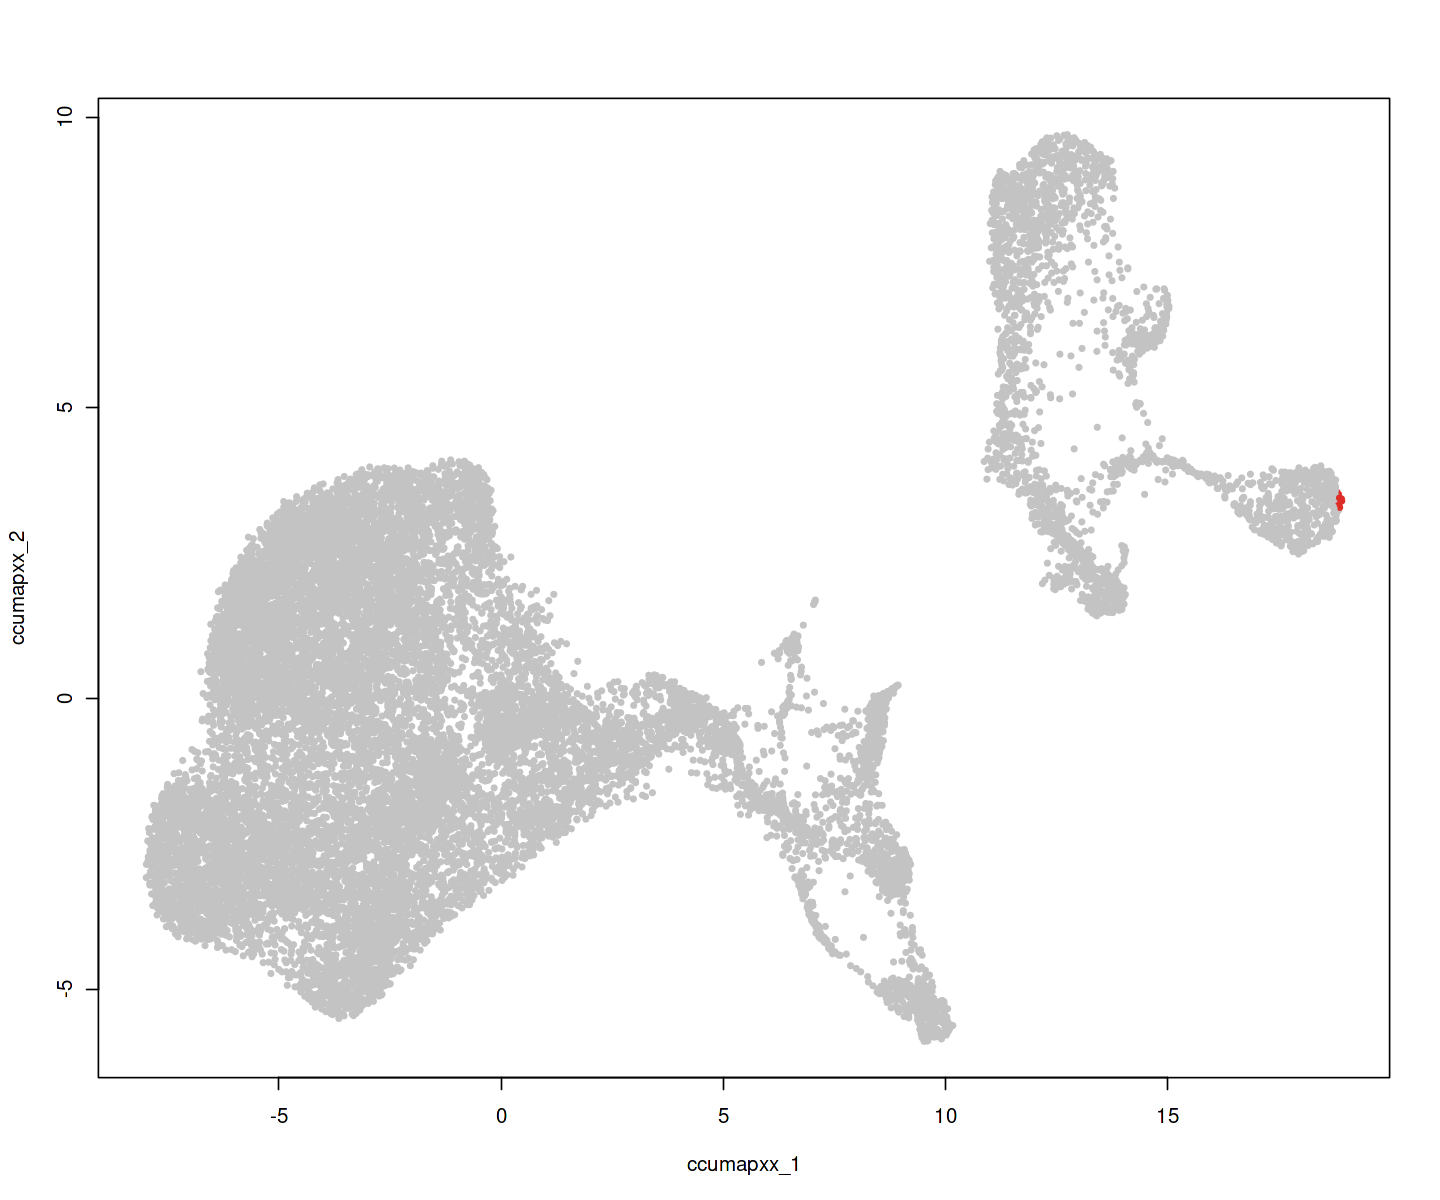

In [16]:
CellSelector(p)


Listening on http://127.0.0.1:5832



[1] "TACTTACCATGTAACC-1_2" "GGTGATTTCAGGAAGC-1_3" "TGTCCCAAGGAGAGTA-1_5"
[4] "TTCTTCCCACTGTGTA-1_5"

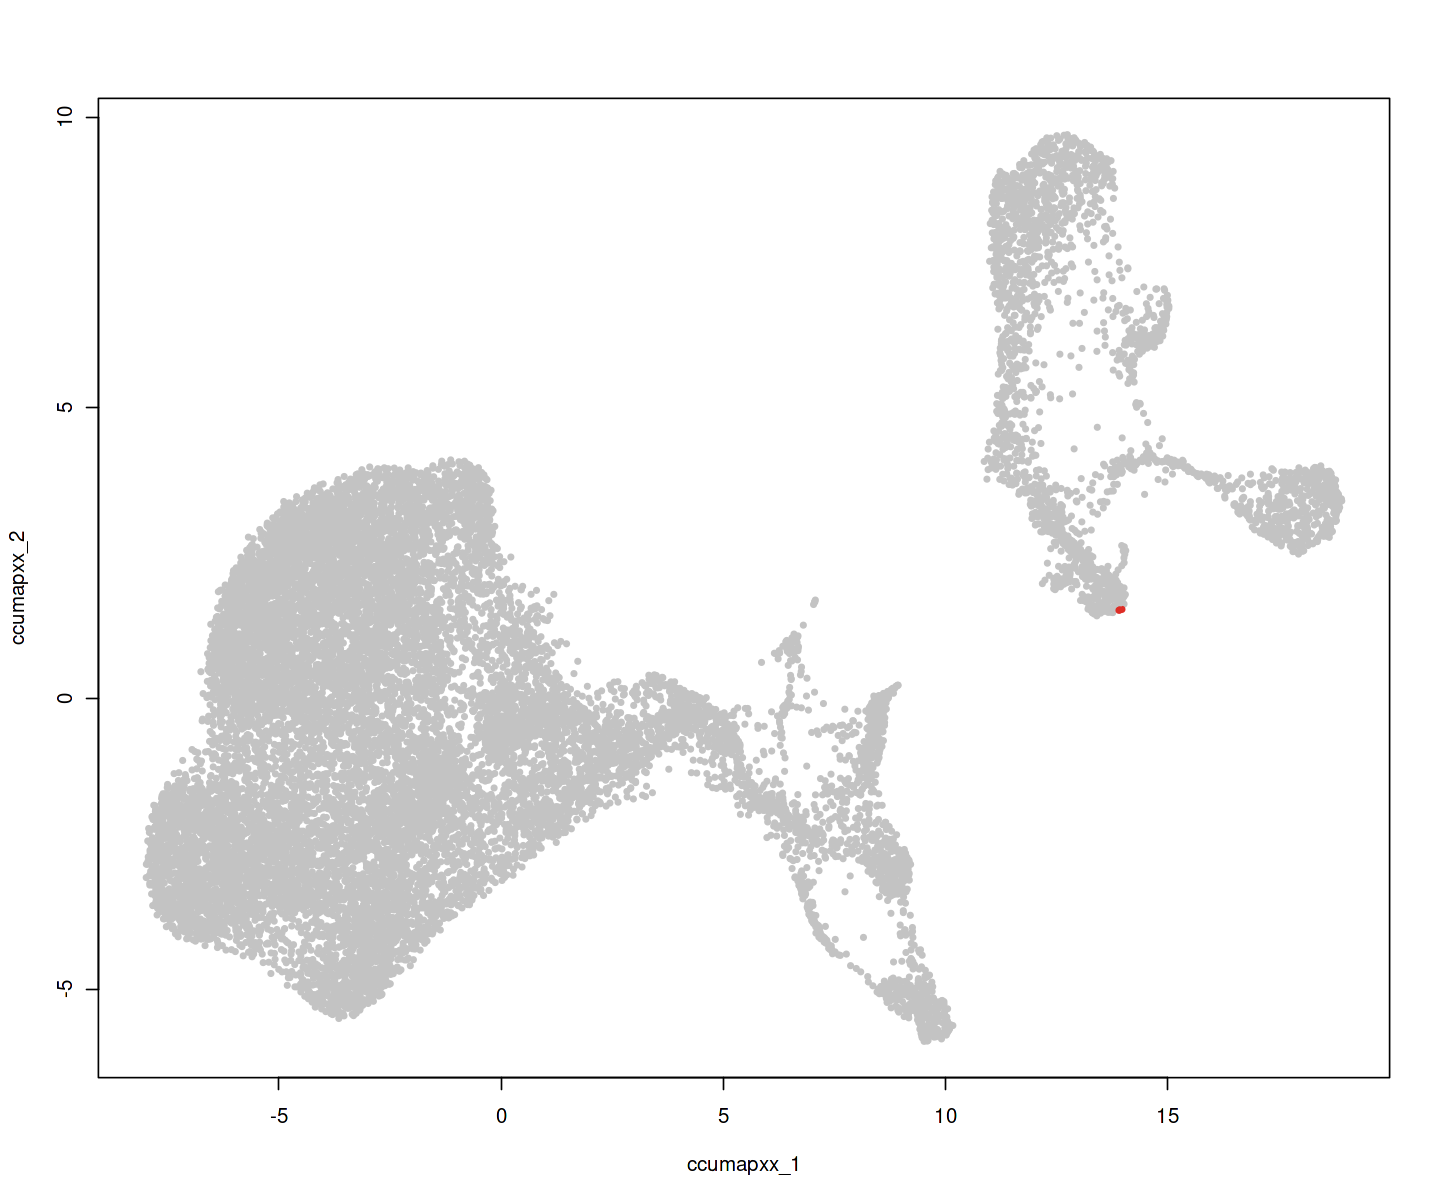

In [17]:
CellSelector(p)


Listening on http://127.0.0.1:5832



[1] "ATCCGTCCACAGAGCA-1_2" "GCACGGTCATCCGGTG-1_2" "TGGAACTTCGCTTTAT-1_2"
[4] "TCAAGACCAGACAAGC-1_3" "TTGGGCGGTGAGGCAT-1_3"

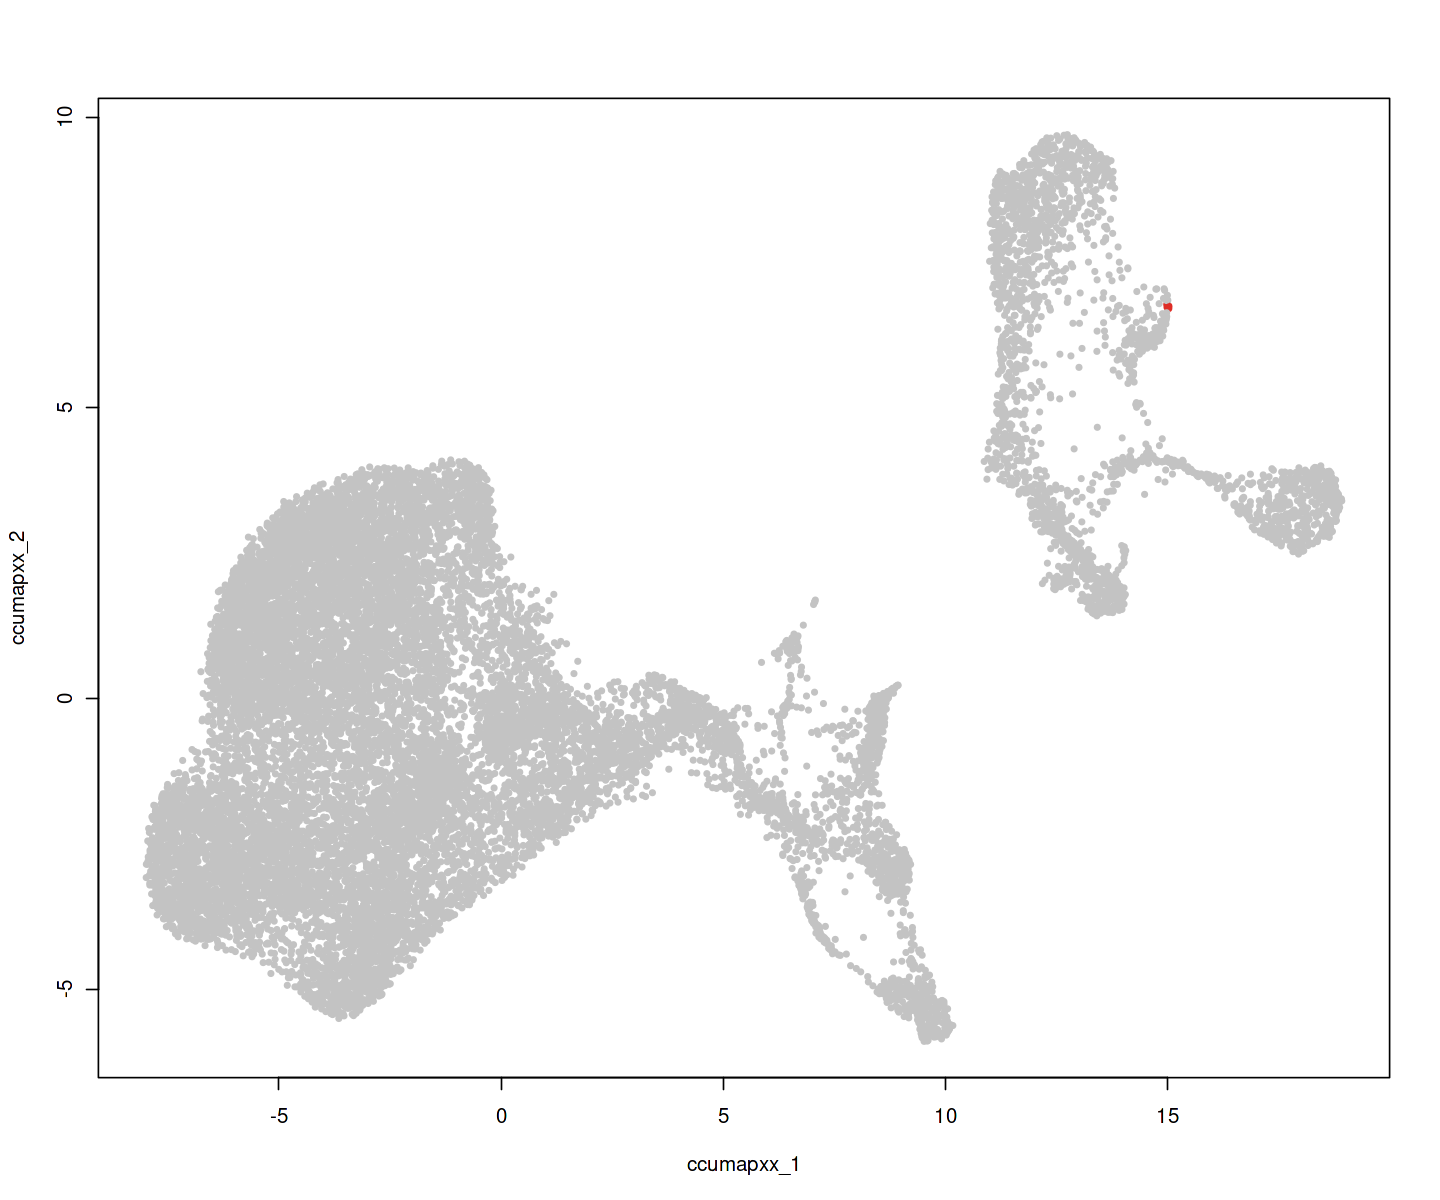

In [18]:
CellSelector(p)


Listening on http://127.0.0.1:5832



[1] "AGAGCAGCAAGGCGTA-1_1" "ATTCCTAAGGGCATGT-1_1" "CGTTGGGCAGCACAGA-1_1"
 [4] "AGGTCATGTCAATGGG-1_2" "GACGTTAGTTCAAGTC-1_2" "CTACAGATCAACCTCC-1_3"
 [7] "GTAGGAGGTAGGTAGC-1_3" "AAGAACATCGGTTCAA-1_4" "TGCGGGTGTTGCCGAC-1_4"
[10] "TTGATGGGTCCCTGAG-1_4" "ATTCCATGTACGAGCA-1_5" "CATACCCTCACCACAA-1_5"
[13] "GCCCAGAGTCGAACAG-1_5"

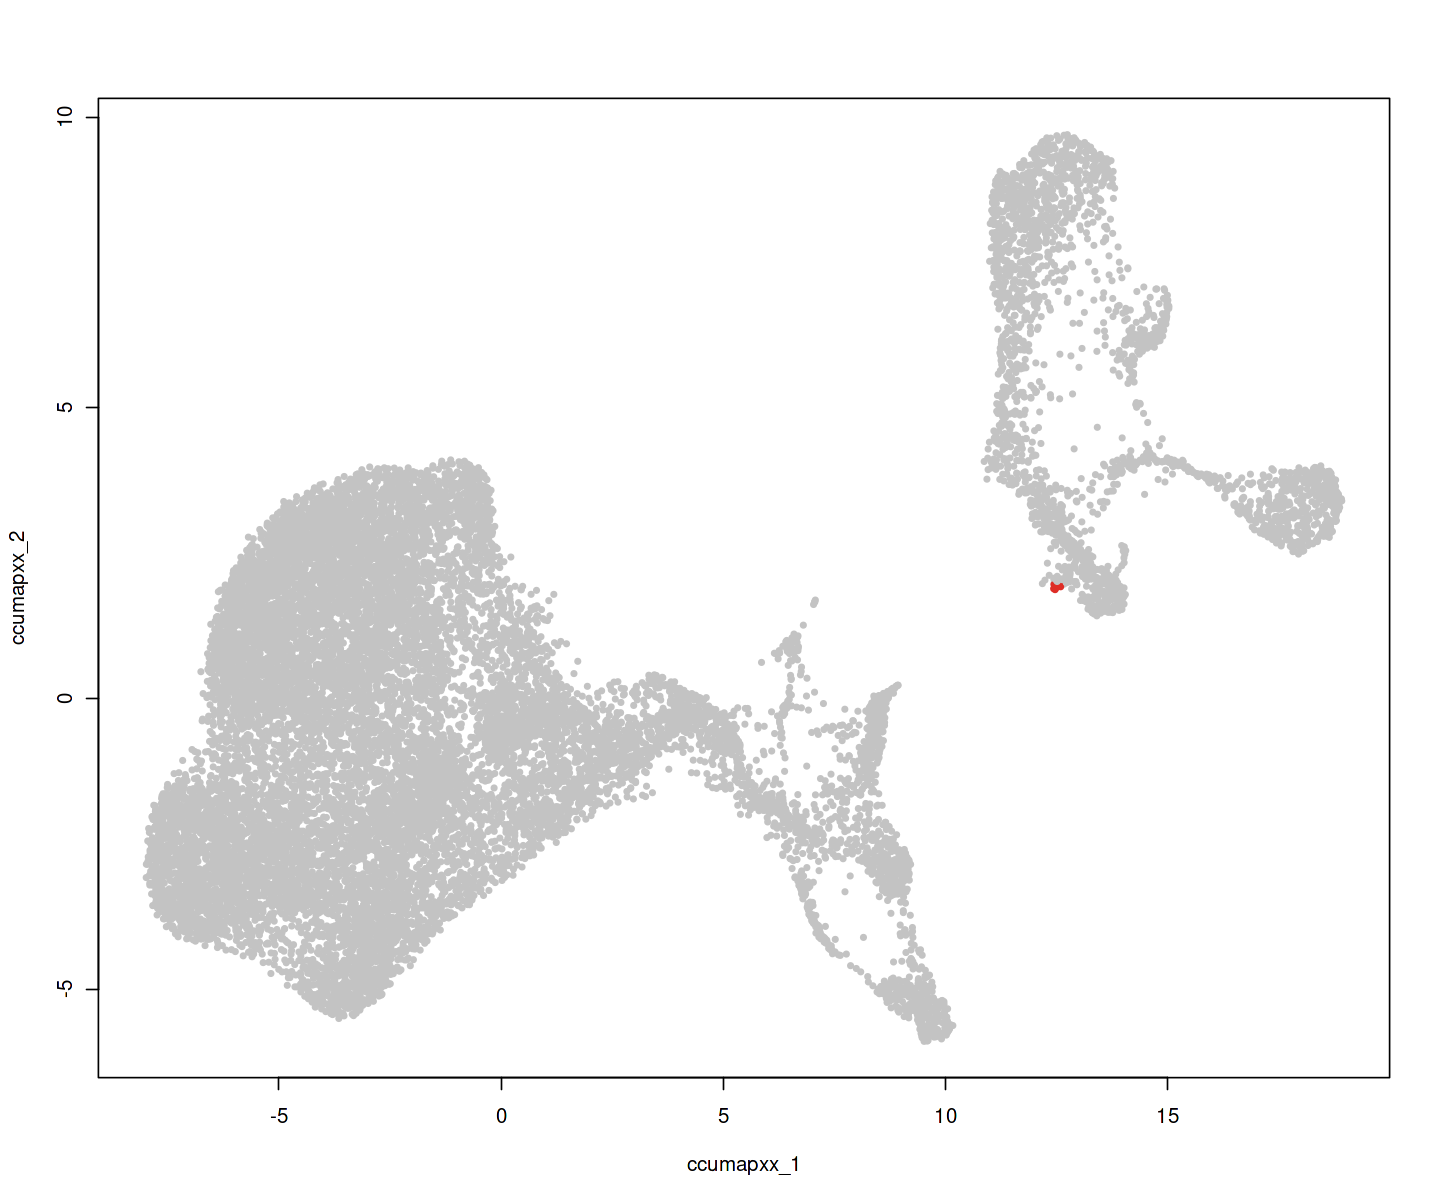

In [19]:
CellSelector(p)


Listening on http://127.0.0.1:5832



[1] "ATAGACCGTGCCGGTT-1_1" "AGATAGATCGTTCTCG-1_2" "CCTCAGTTCAAGATAG-1_3"
[4] "GGCTTTCGTCCTGTTC-1_4" "AAGTACCGTACTGCCG-1_5" "CATGAGTAGTCCGCCA-1_5"
[7] "GTAGATCGTATGTCCA-1_5"

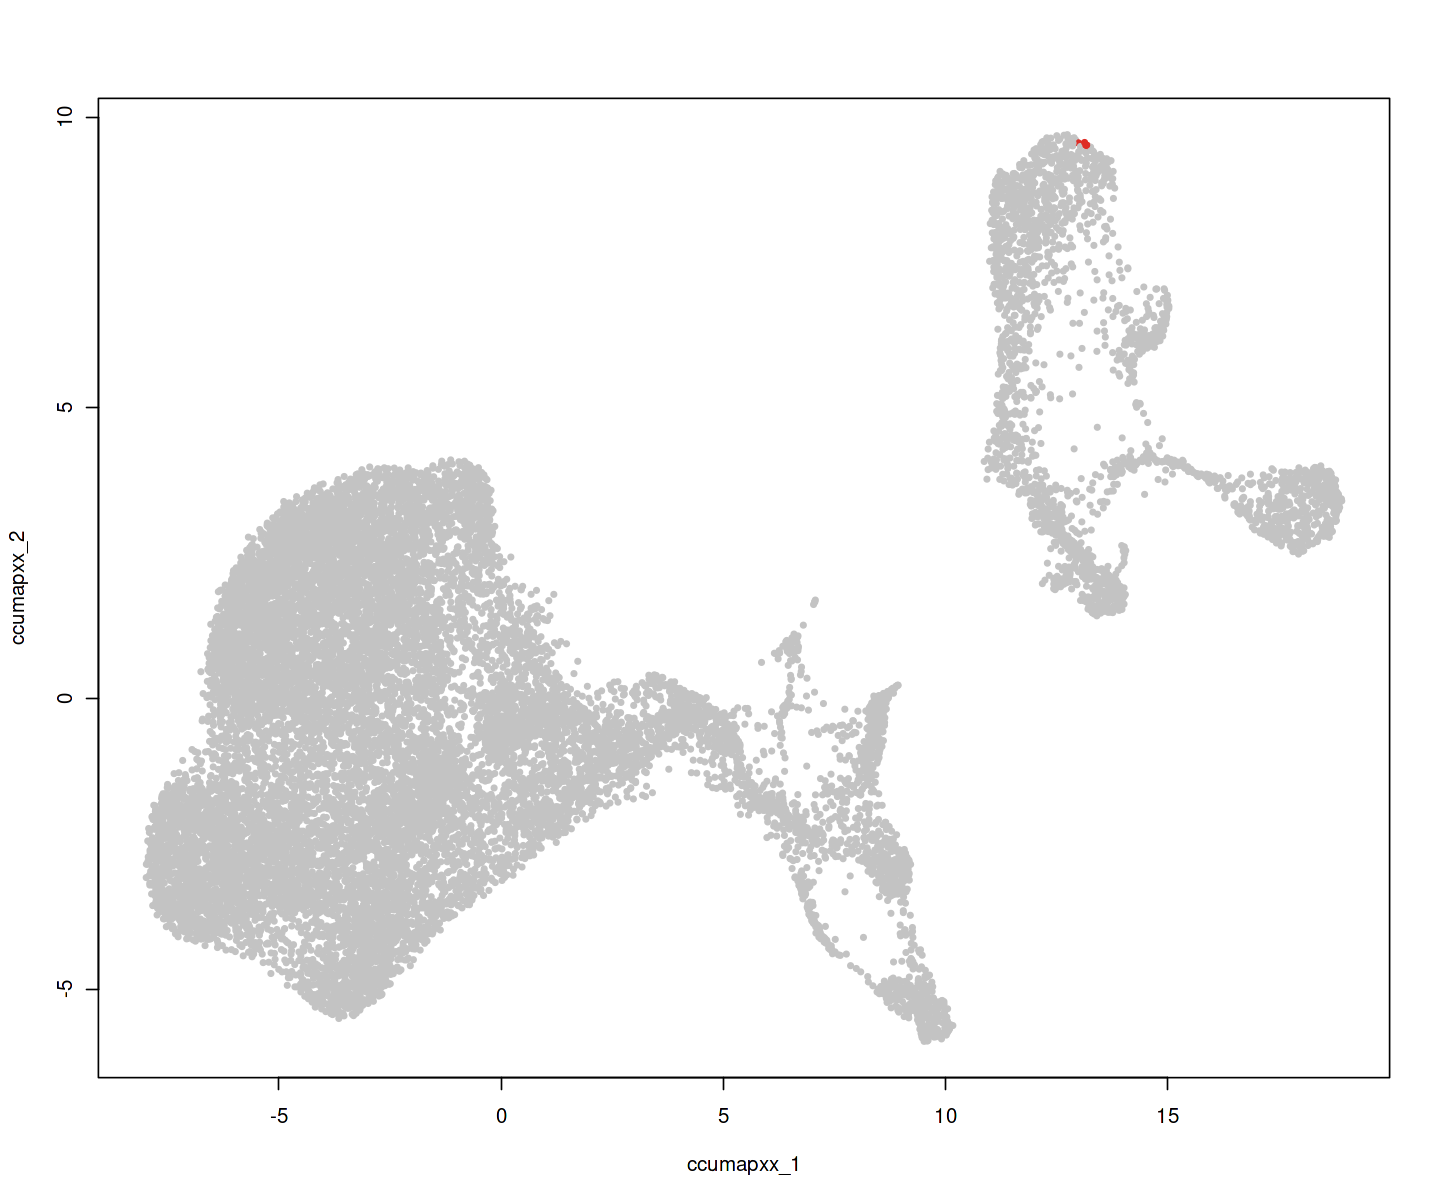

In [20]:
CellSelector(p)


Listening on http://127.0.0.1:5832



[1] "CAATCGACAGTGGTGA-1_1" "CCGCAAGTCCAGTGCG-1_1" "CGATCGGCAATACGCT-1_1"
 [4] "CTGATCCAGCGAGTAC-1_1" "GCCCAGACAGCACCCA-1_1" "CTTGAGACATTAGGCT-1_4"
 [7] "GAAGCCCCACCCTCTA-1_4" "CAGATTGTCAAGTCGT-1_5" "CTTCCGAAGCACCTGC-1_5"
[10] "GTCAAGTAGCCTCTGG-1_5" "TGCGGGTTCGATTTCT-1_5"

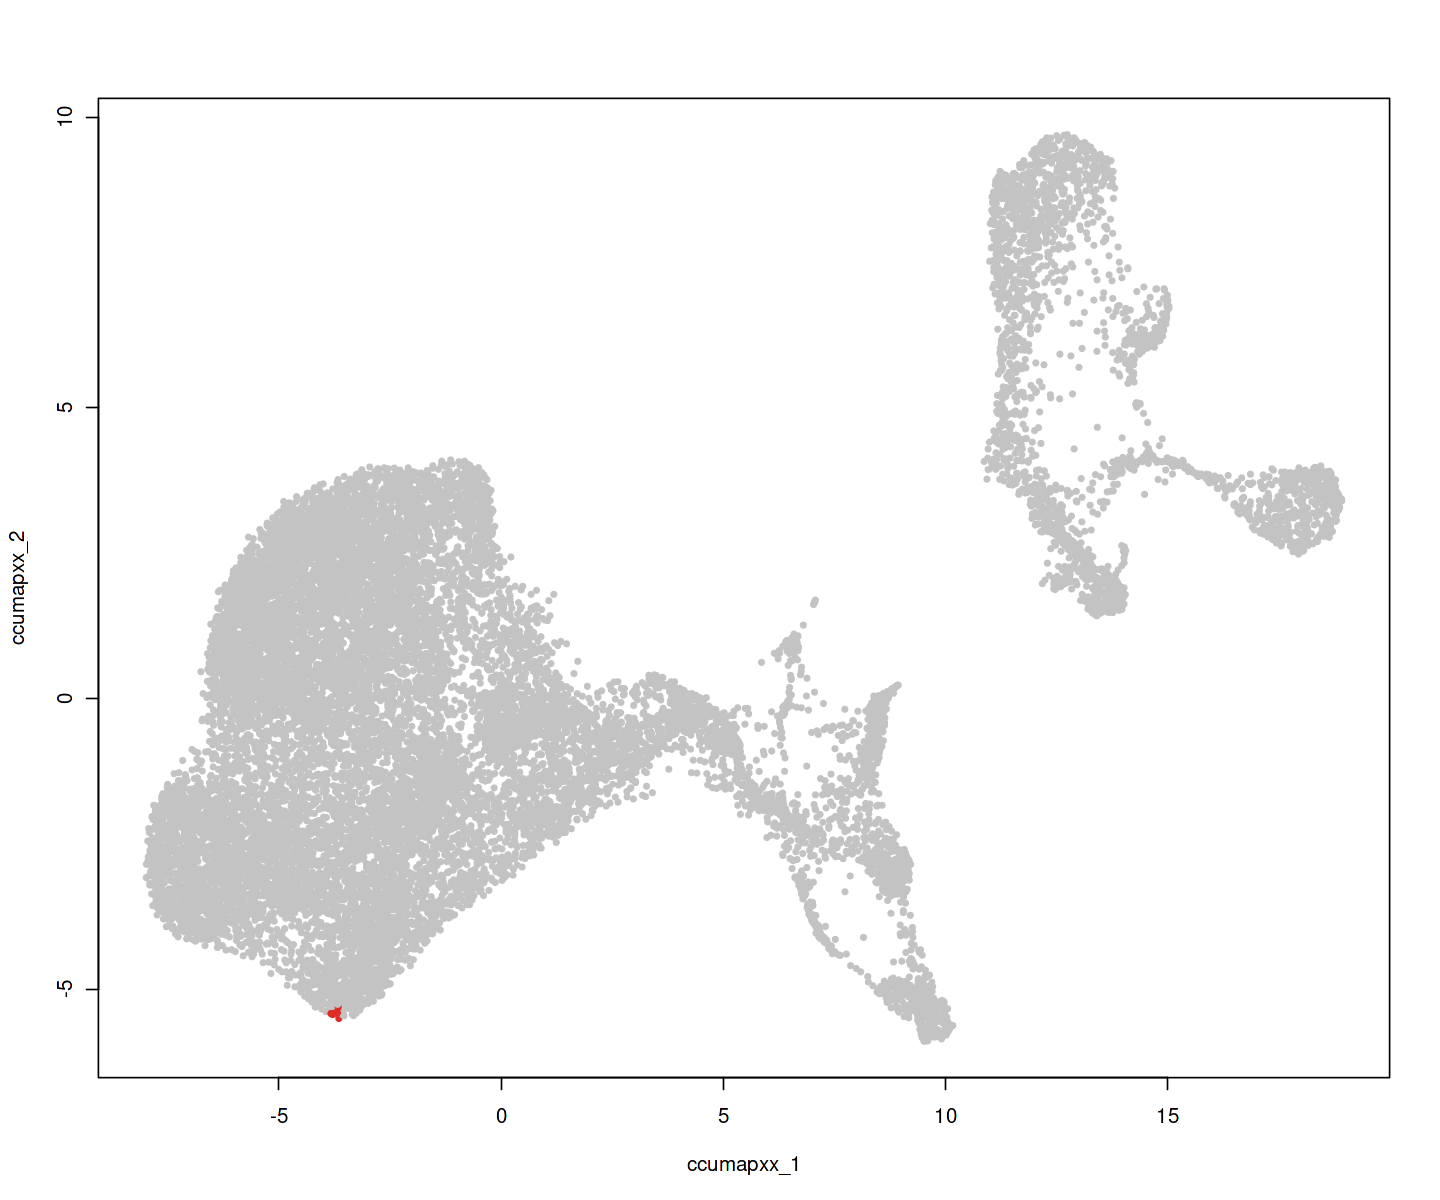

In [21]:
CellSelector(p)



Listening on http://127.0.0.1:5832



[1] "AGGTAGGCACCCAACG-1_1" "TCCGATCGTCGCATCG-1_1" "AGGGTCCTCTTCACGC-1_2"
[4] "CCTCTAGTCTATTGTC-1_2" "CAAGCTAGTTGCTCCT-1_3" "CACGAATTCTCTCGCA-1_3"
[7] "TGACAGTAGAGTCACG-1_3" "TGGTAGTAGCCGTTAT-1_4" "CAGAGCCTCTTAGTTC-1_5"

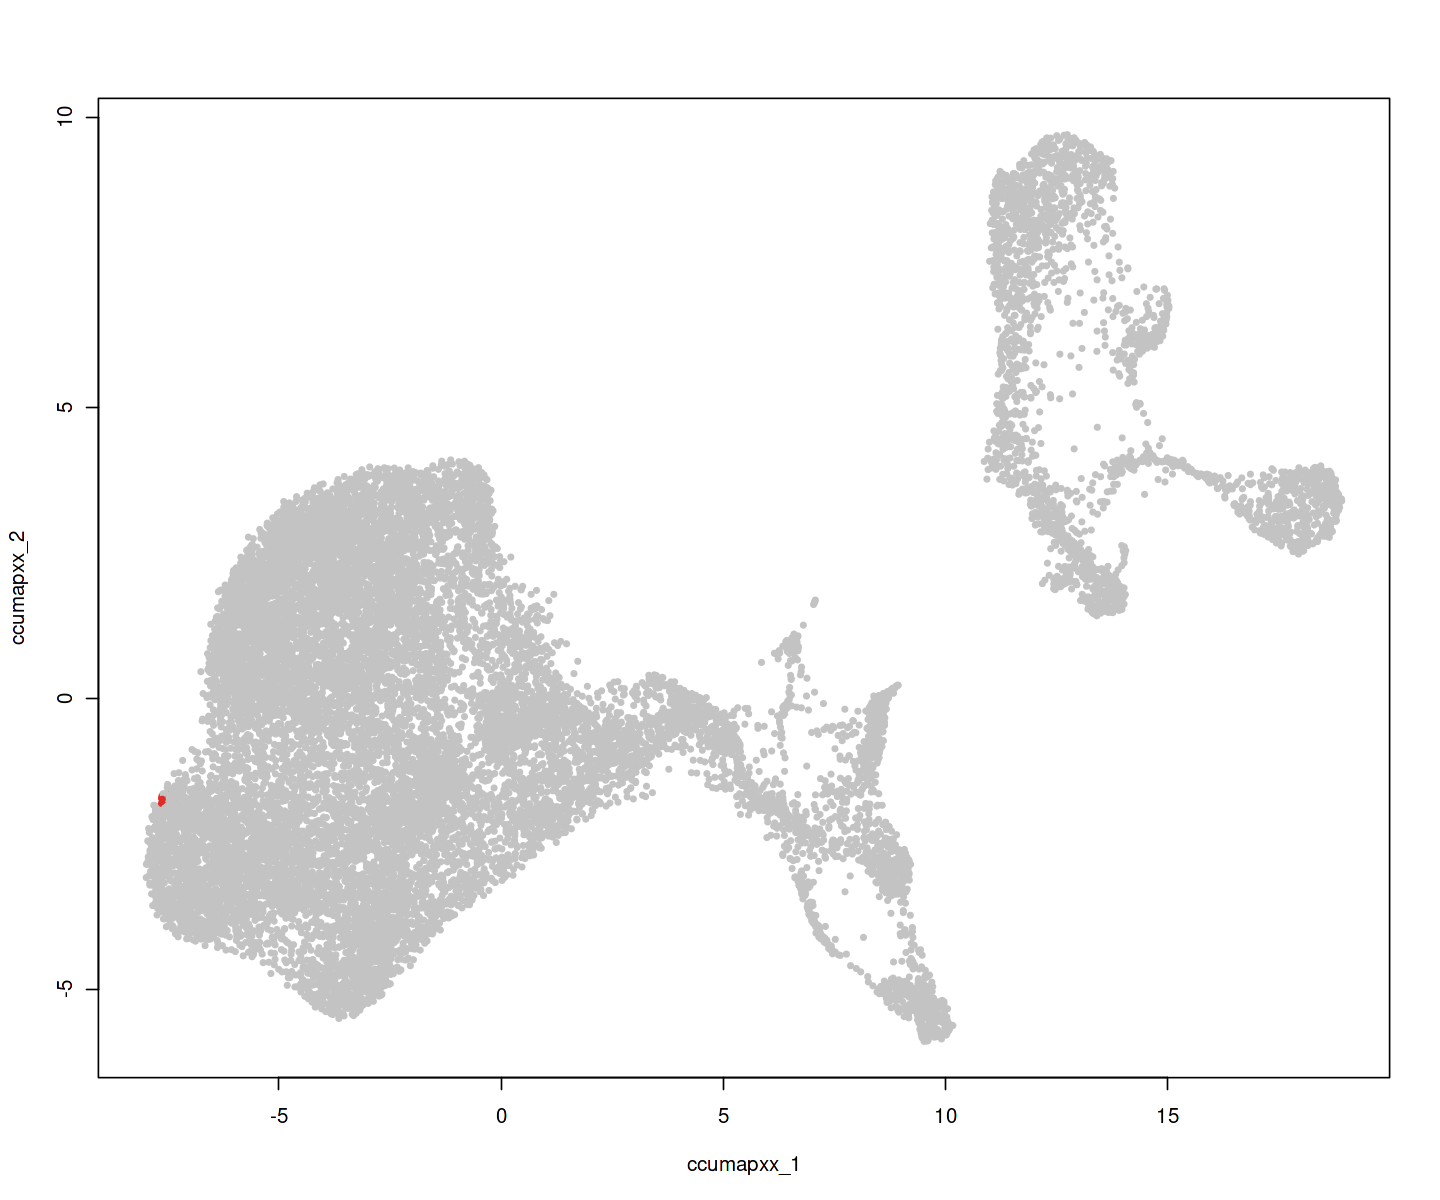

In [22]:
CellSelector(p)


Listening on http://127.0.0.1:5832



[1] "CTCCCAAAGCGGACAT-1_1" "TACCGAACAACTGAAA-1_2" "CTCAACCAGCACGTCC-1_3"
[4] "CTGCCTAAGGTTAAAC-1_3" "GTAGGTTTCTGCTTAT-1_3" "TCCAGAAAGGATTCAA-1_3"
[7] "AGGAGGTAGCCTAGGA-1_4" "CGAGGCTCAGGCTATT-1_4" "CTCCAACCACATTCGA-1_4"

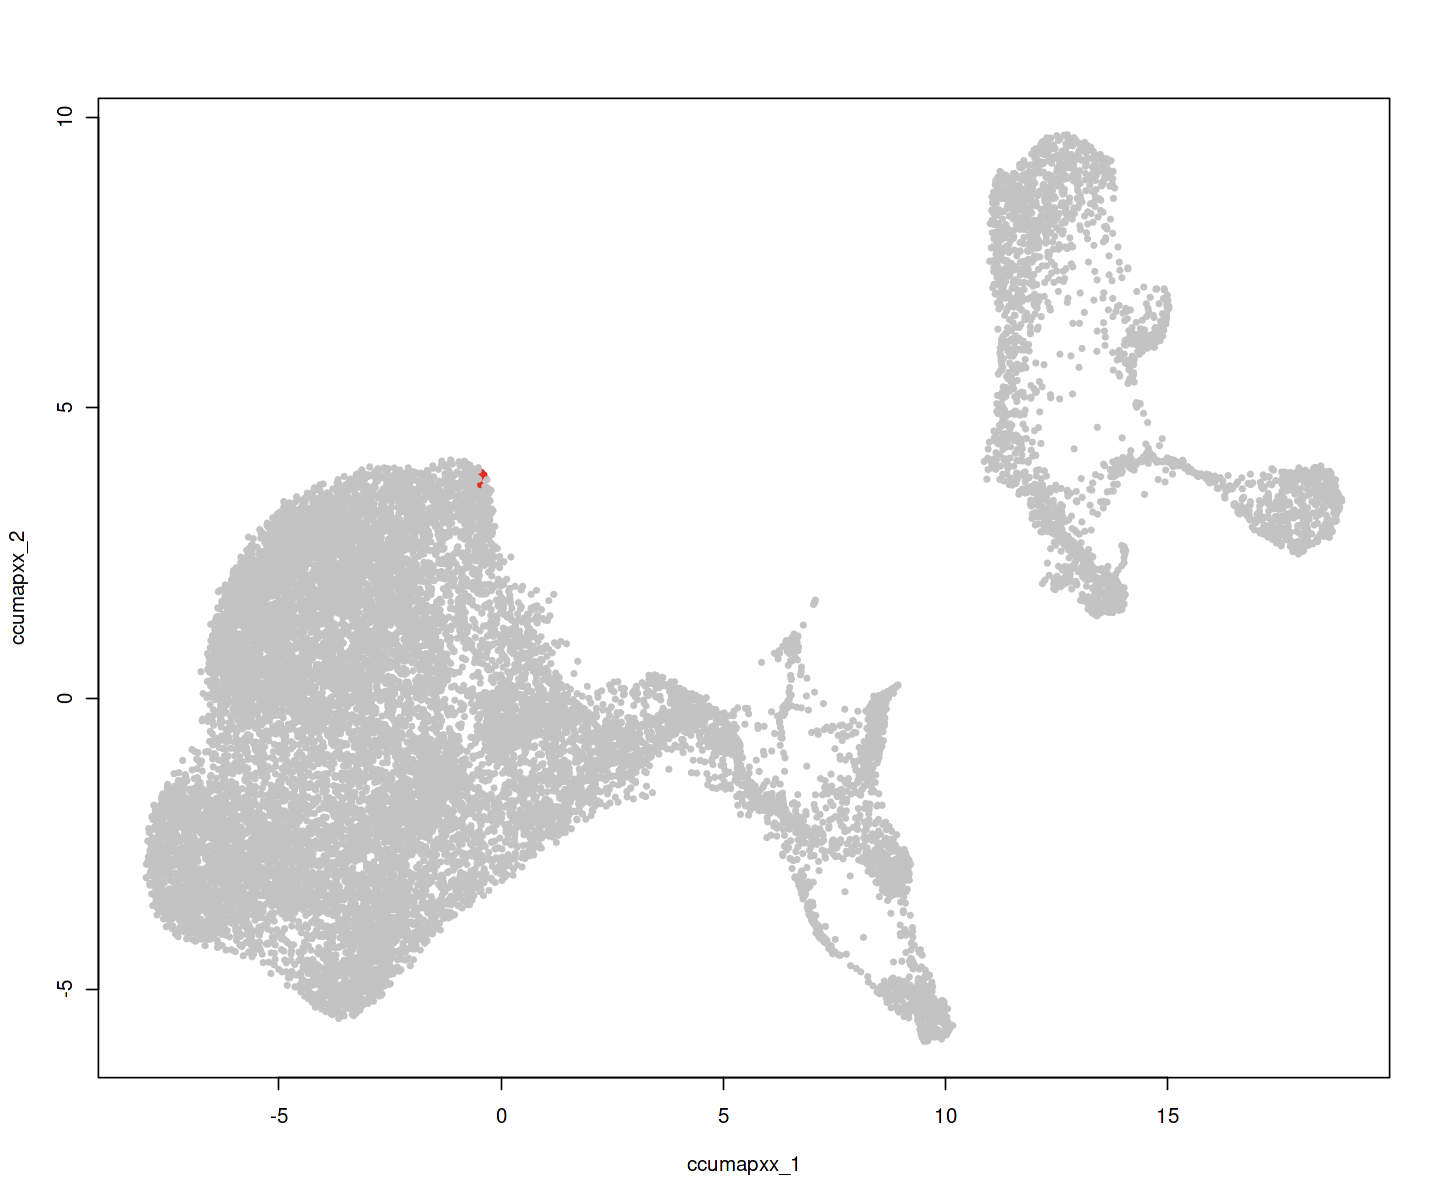

In [23]:
CellSelector(p)


Listening on http://127.0.0.1:5832



[1] "ATCACGATCCACAGCG-1_1" "CTTCTCTTCGCATTAG-1_2" "AAGCATCTCTCAACCC-1_3"
 [4] "AATAGAGTCCAACTGA-1_3" "CAGATCATCTTACCAT-1_3" "CGATGCGGTAGGTACG-1_4"
 [7] "GAACTGTCACAAATAG-1_4" "GGGATGAAGATTCGAA-1_4" "CAGCACGTCAGGAGAC-1_5"
[10] "GGGTCACAGTTTGAGA-1_5"

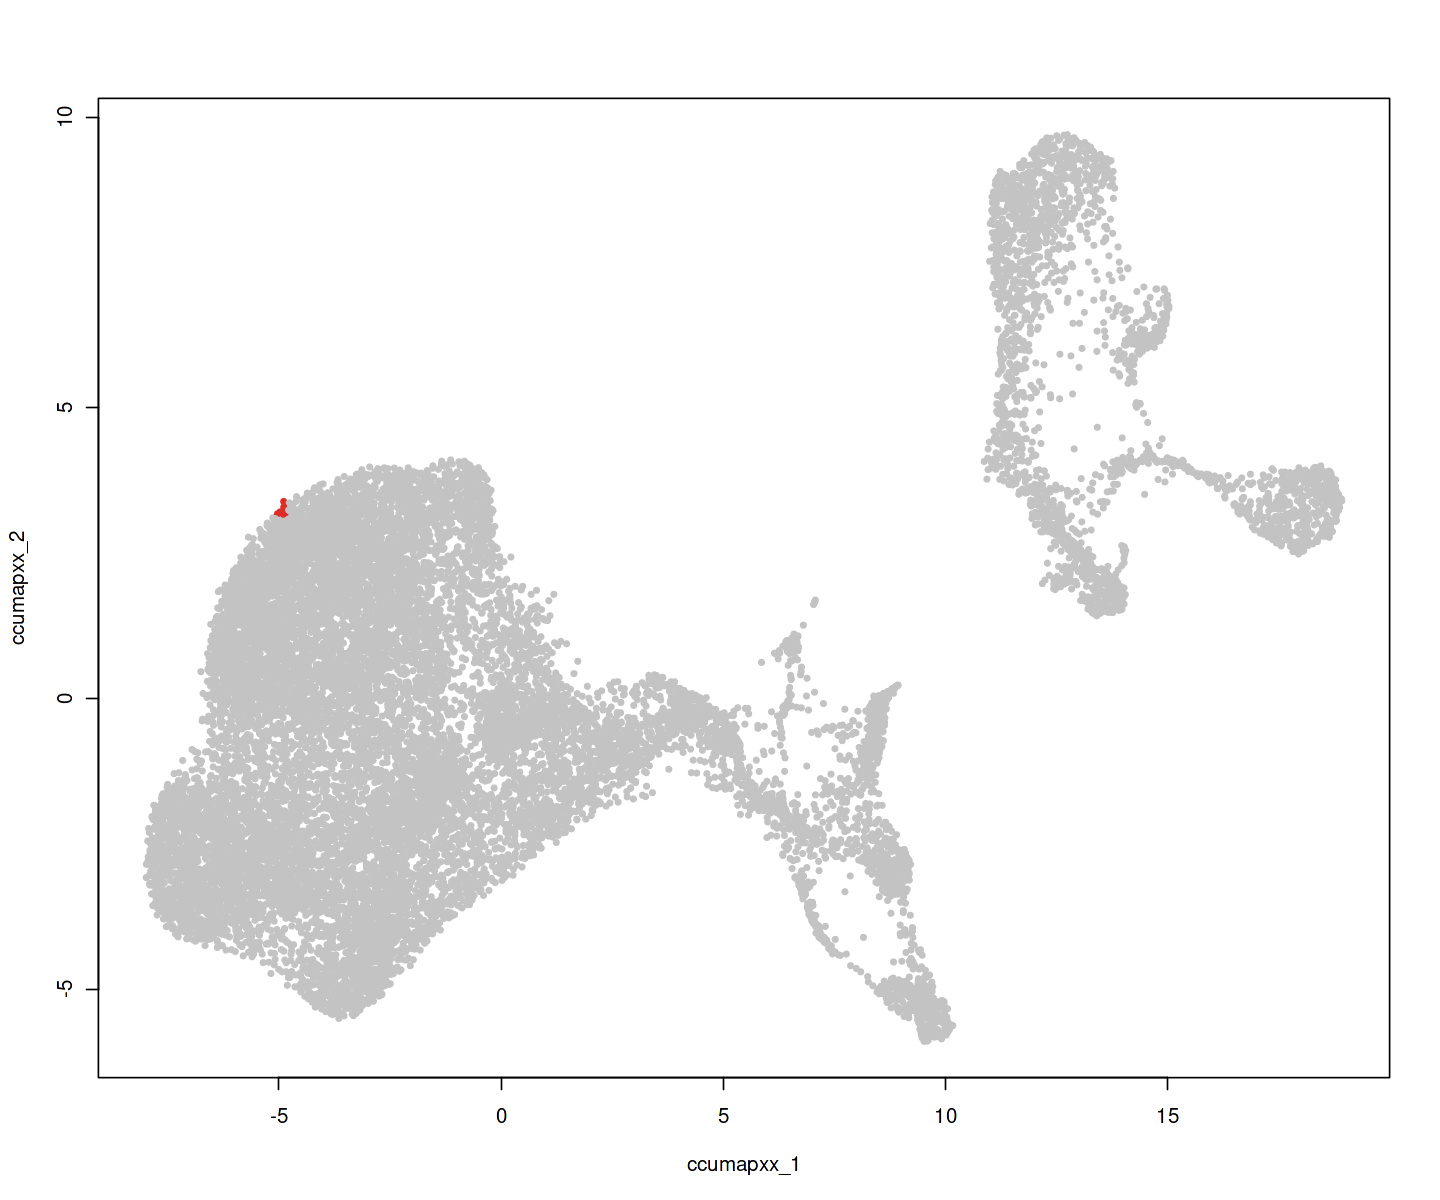

In [24]:
CellSelector(p)


Listening on http://127.0.0.1:5832



[1] "AGGACGACACTACACA-1_1" "CTAACTTAGGTGCTTT-1_4" "CTCATGCTCATTTACC-1_4"
[4] "GACCTTCCAAGATGGC-1_4"

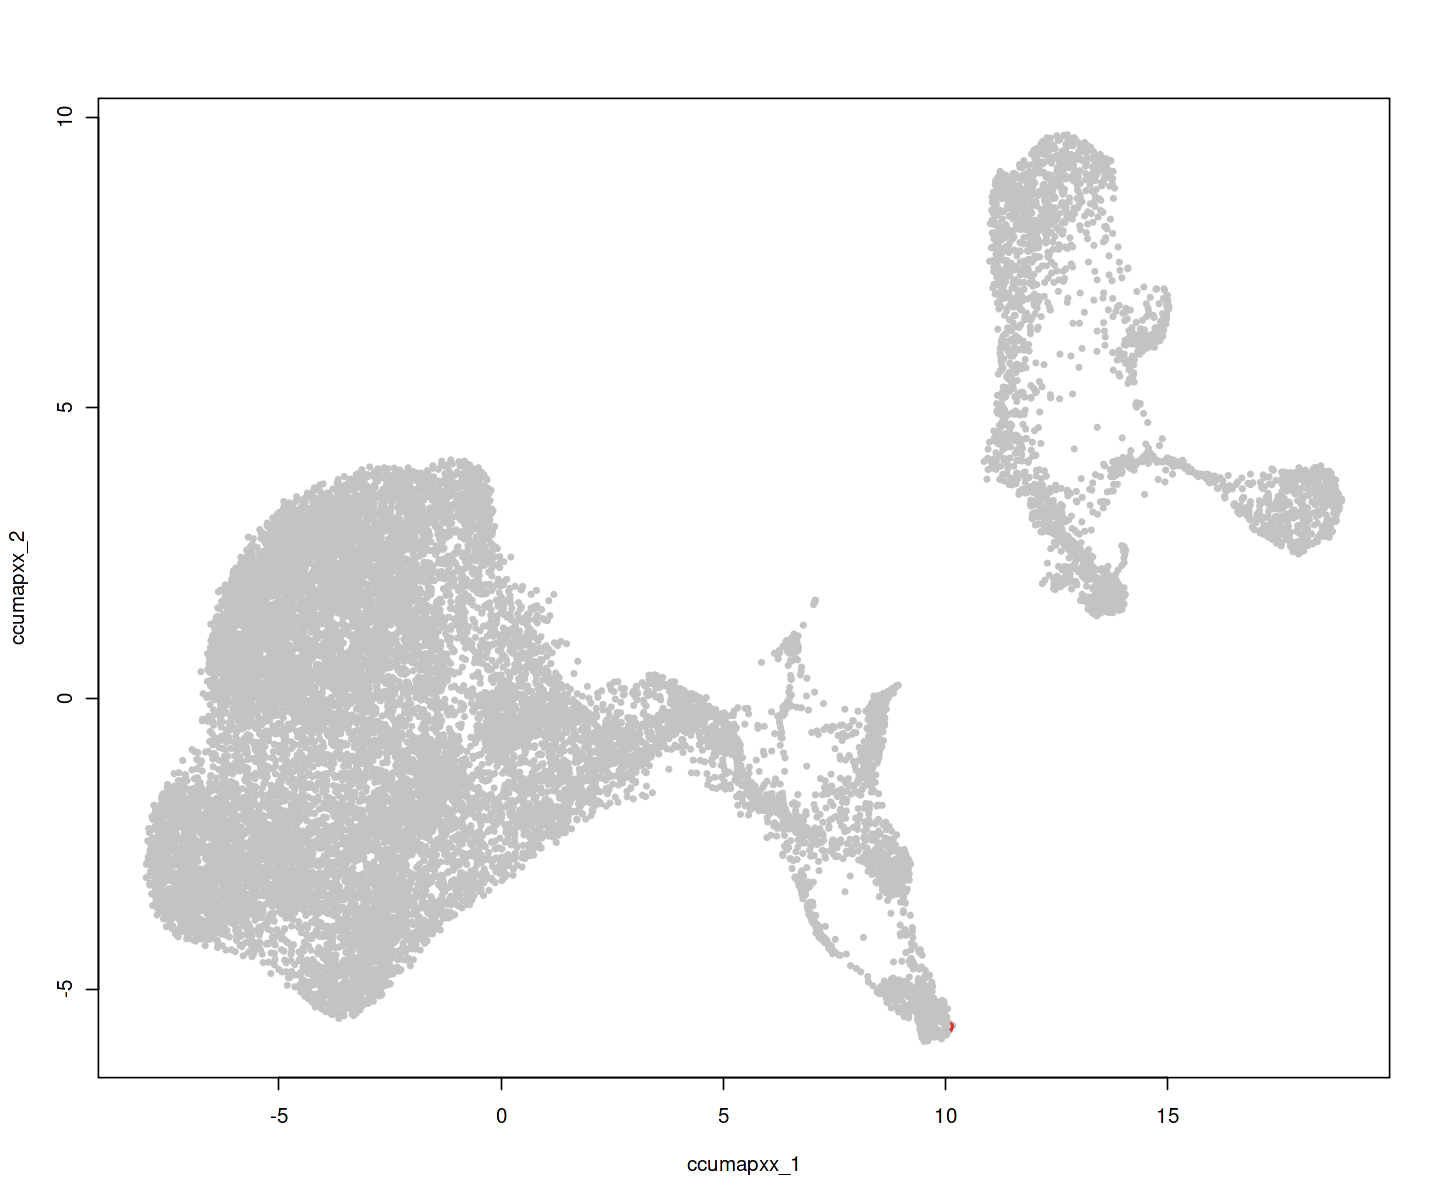

In [25]:
CellSelector(p)

End and starting points:
"EMP" = 'TAAGTCGTCCTCTGCA-1_1',
"Endothelium" = 'TACTTACCATGTAACC-1_2',
"MkP" = 'ATCCGTCCACAGAGCA-1_2',
'Endocardium' = 'AGAGCAGCAAGGCGTA-1_1',
'Erythroid' = 'ATAGACCGTGCCGGTT-1_1',
'Mesenchyme' = 'CAATCGACAGTGGTGA-1_1',
'Epicardium' = 'AGGTAGGCACCCAACG-1_1',
'Limb Mesoderm' = 'CTCCCAAAGCGGACAT-1_1',
'Allantois' = 'ATCACGATCCACAGCG-1_1',
'Naive' = 'AGGACGACACTACACA-1_1',


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



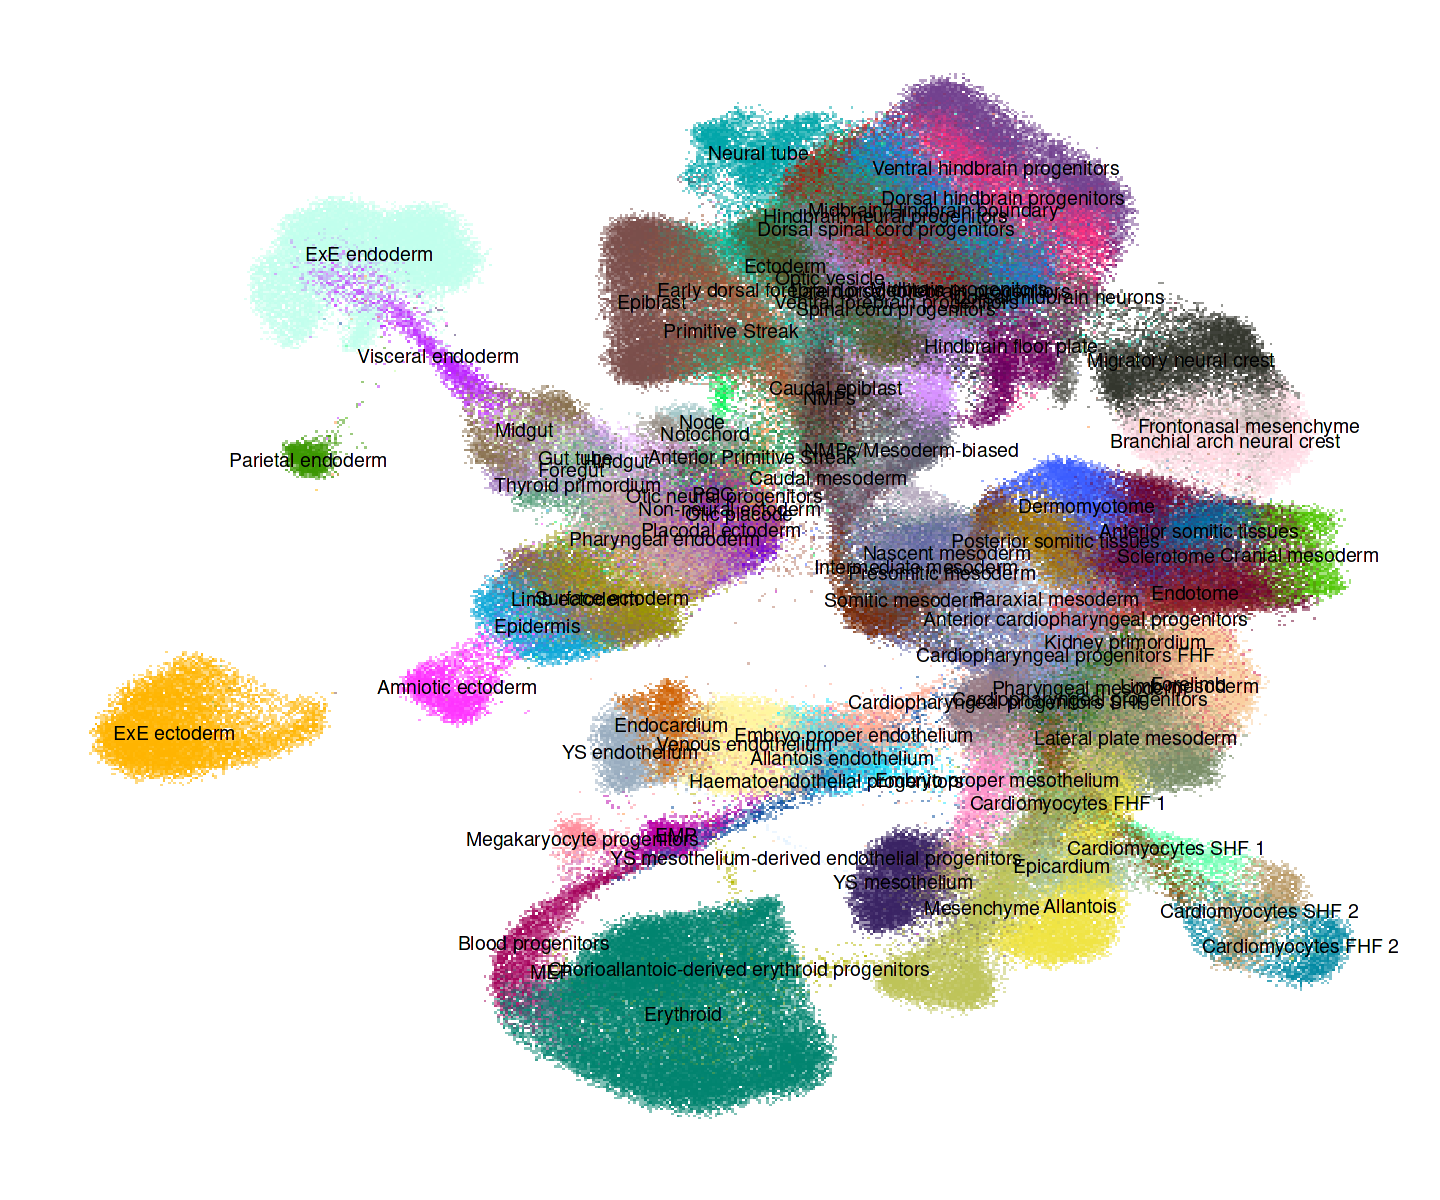

In [27]:
options(repr.plot.width = 12, repr.plot.height = 10)
DimPlot(atlas, reduction = "UMAP", group.by = 'celltype_extended_atlas',label = TRUE,cols = r3dcol$cols_94, alpha = 0.5)+ NoAxes()+NoLegend() + theme(plot.title = element_blank())


In [28]:
a <- DimPlot(atlas, reduction = "UMAP", group.by = 'celltype_extended_atlas',label = TRUE,cols = r3dcol$cols_94, alpha = 0.5)+ NoAxes()+NoLegend() + theme(plot.title = element_blank())


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`




Listening on http://127.0.0.1:5832



[1] "cell_5669"   "cell_14528"  "cell_15629"  "cell_30491"  "cell_78860" 
 [6] "cell_79789"  "cell_82963"  "cell_83320"  "cell_90992"  "cell_103633"
[11] "cell_103717" "cell_103882" "cell_105110" "cell_105477" "cell_105856"
[16] "cell_106140" "cell_108024" "cell_108165" "cell_108172" "cell_108465"
[21] "cell_108703" "cell_110146" "cell_110823" "cell_110966" "cell_111559"
[26] "cell_112566" "cell_112813" "cell_112856" "cell_113290" "cell_113394"
[31] "cell_113444" "cell_113657" "cell_113753" "cell_114348" "cell_114511"

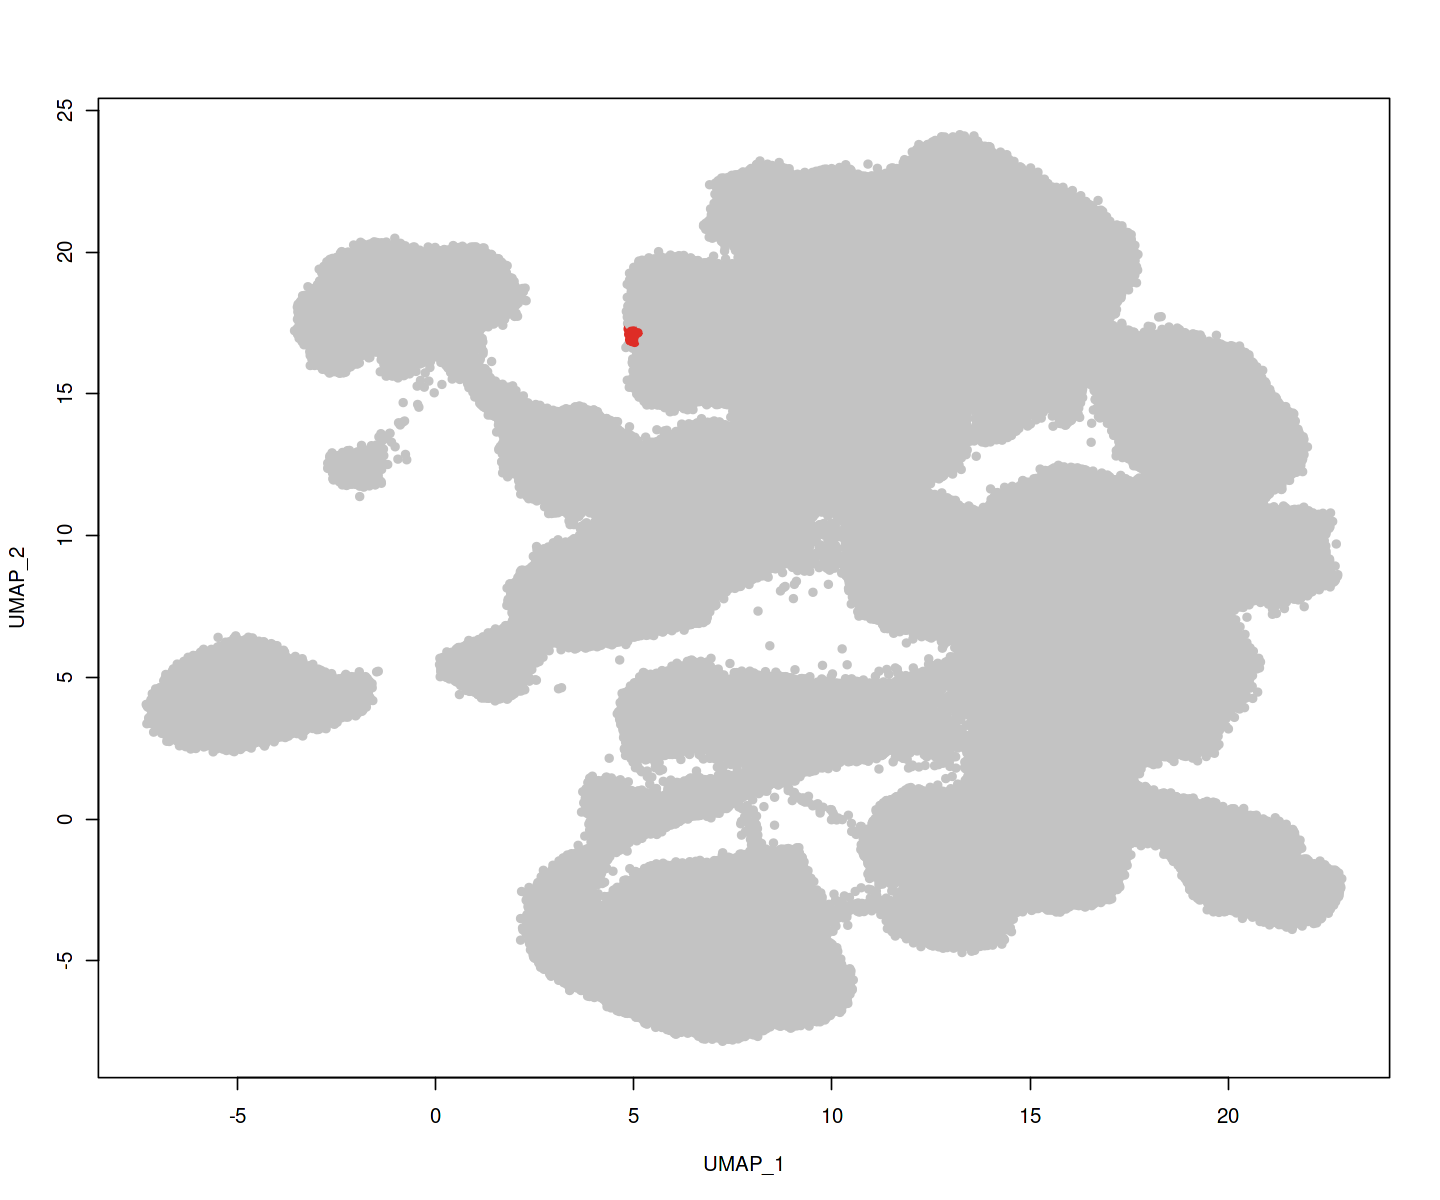

In [29]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_187495" "ext_cell_188744" "ext_cell_191579" "ext_cell_197927"
 [5] "ext_cell_198409" "ext_cell_198682" "ext_cell_199053" "ext_cell_199239"
 [9] "ext_cell_199320" "ext_cell_199598" "ext_cell_199611" "ext_cell_201001"
[13] "ext_cell_201164" "ext_cell_208896" "ext_cell_210860" "ext_cell_211158"
[17] "ext_cell_214436" "ext_cell_220002" "ext_cell_220125" "ext_cell_220144"
[21] "ext_cell_220177" "ext_cell_220179" "ext_cell_220223" "ext_cell_220389"
[25] "ext_cell_220391" "ext_cell_220405" "ext_cell_220412" "ext_cell_220554"
[29] "ext_cell_220624" "ext_cell_220714" "ext_cell_220728" "ext_cell_220781"
[33] "ext_cell_220809" "ext_cell_220819" "ext_cell_220952" "ext_cell_220955"
[37] "ext_cell_221046" "ext_cell_221327" "ext_cell_221454" "ext_cell_221665"
[41] "ext_cell_221730" "ext_cell_221876" "ext_cell_221902" "ext_cell_222153"
[45] "ext_cell_222233" "ext_cell_222256" "ext_cell_222282" "ext_cell_222452"
[49] "ext_cell_222556" "ext_cell_222571" "ext_cell_222629" "ext_cell_222680"
[53] "ext_cell_222835" "ext_cell_222839" "ext_cell_222858" "ext_cell_223100"
[57] "ext_cell_223153" "ext_cell_223374" "ext_cell_223383" "ext_cell_223398"
[61] "ext_cell_223424" "ext_cell_223506" "ext_cell_223552" "ext_cell_223649"
[65] "ext_cell_223669" "ext_cell_223672" "ext_cell_223711" "ext_cell_223713"
[69] "ext_cell_223827" "ext_cell_224133" "ext_cell_224238" "ext_cell_224294"
[73] "ext_cell_224493" "ext_cell_224536" "ext_cell_234909" "ext_cell_241293"
[77] "ext_cell_241458" "ext_cell_241754" "ext_cell_241970" "ext_cell_242117"
[81] "ext_cell_242133" "ext_cell_242963" "ext_cell_243067" "ext_cell_243167"
[85] "ext_cell_243271" "ext_cell_243414" "ext_cell_243750" "ext_cell_243834"
[89] "ext_cell_244020" "ext_cell_244049" "ext_cell_260831" "ext_cell_262708"
[93] "ext_cell_262744" "ext_cell_262793" "ext_cell_263012"

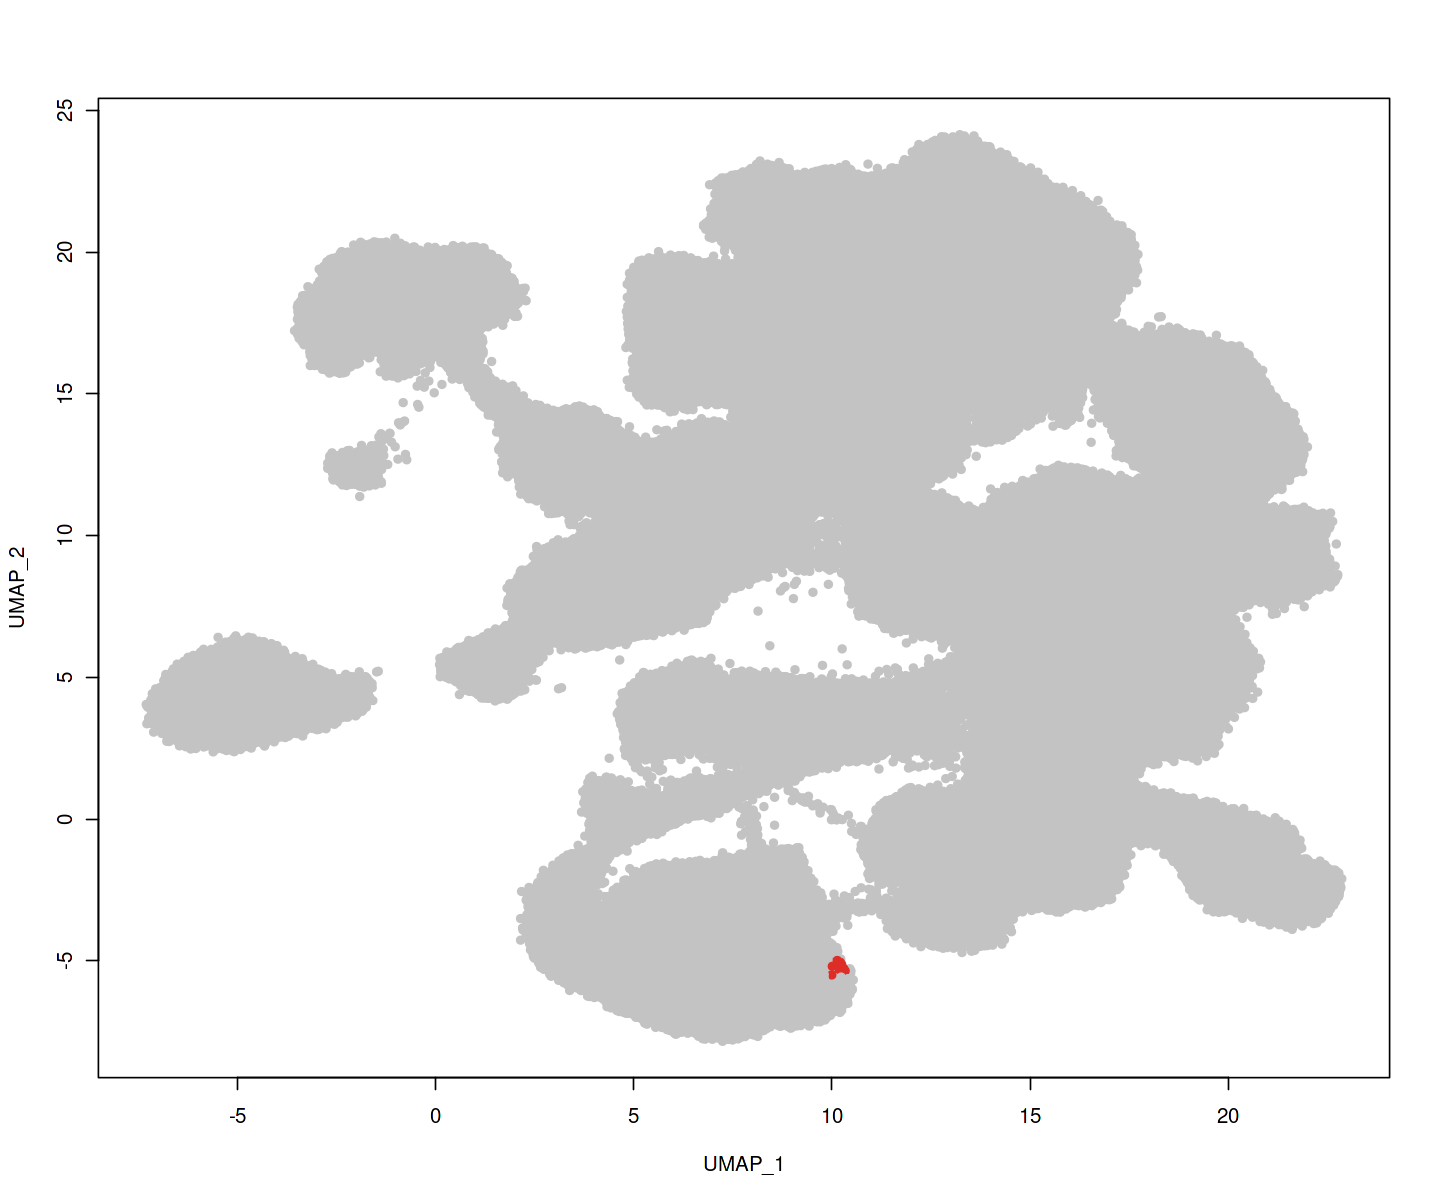

In [32]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_198830" "ext_cell_198845" "ext_cell_199631" "ext_cell_220442"
[5] "ext_cell_221878" "ext_cell_243347" "ext_cell_262888" "ext_cell_329685"

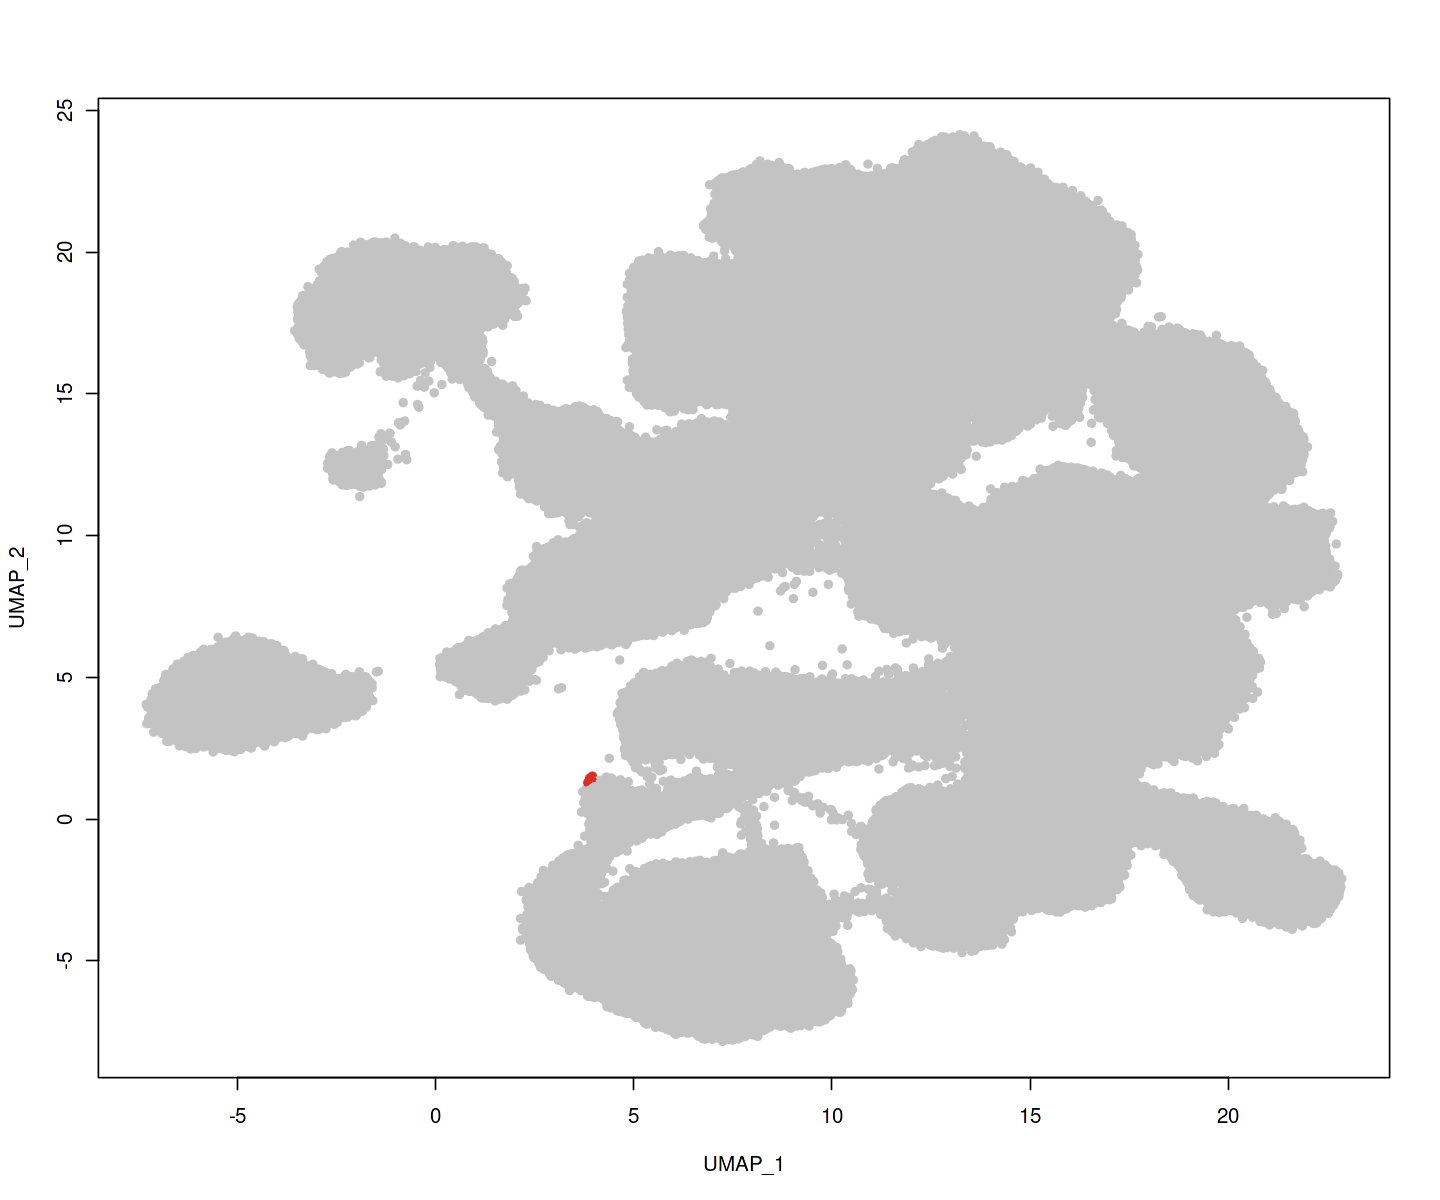

In [33]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_15342"  "ext_cell_15535"  "ext_cell_15668"  "ext_cell_15788" 
[5] "ext_cell_16424"  "ext_cell_33842"  "ext_cell_34840"  "ext_cell_150344"
[9] "ext_cell_181584"

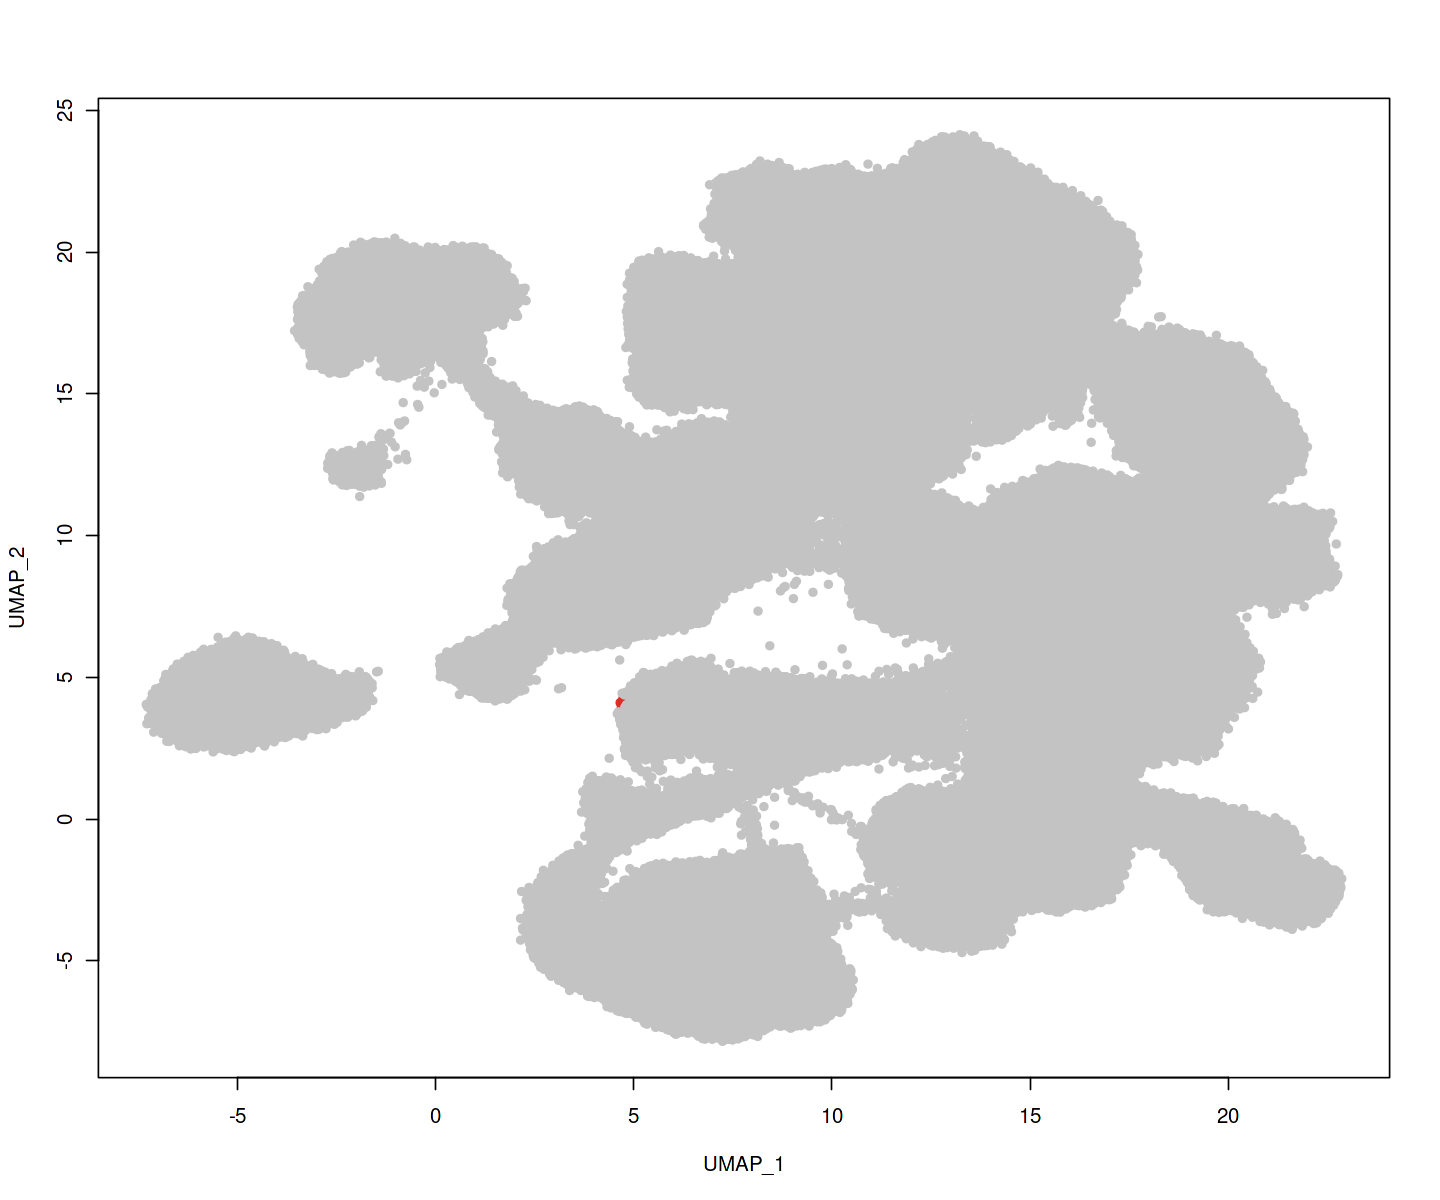

In [34]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_30582"  "ext_cell_32384"  "ext_cell_36162"  "ext_cell_39997" 
 [5] "ext_cell_42584"  "ext_cell_81526"  "ext_cell_92969"  "ext_cell_110441"
 [9] "ext_cell_162763" "ext_cell_164905" "ext_cell_167254" "ext_cell_323254"

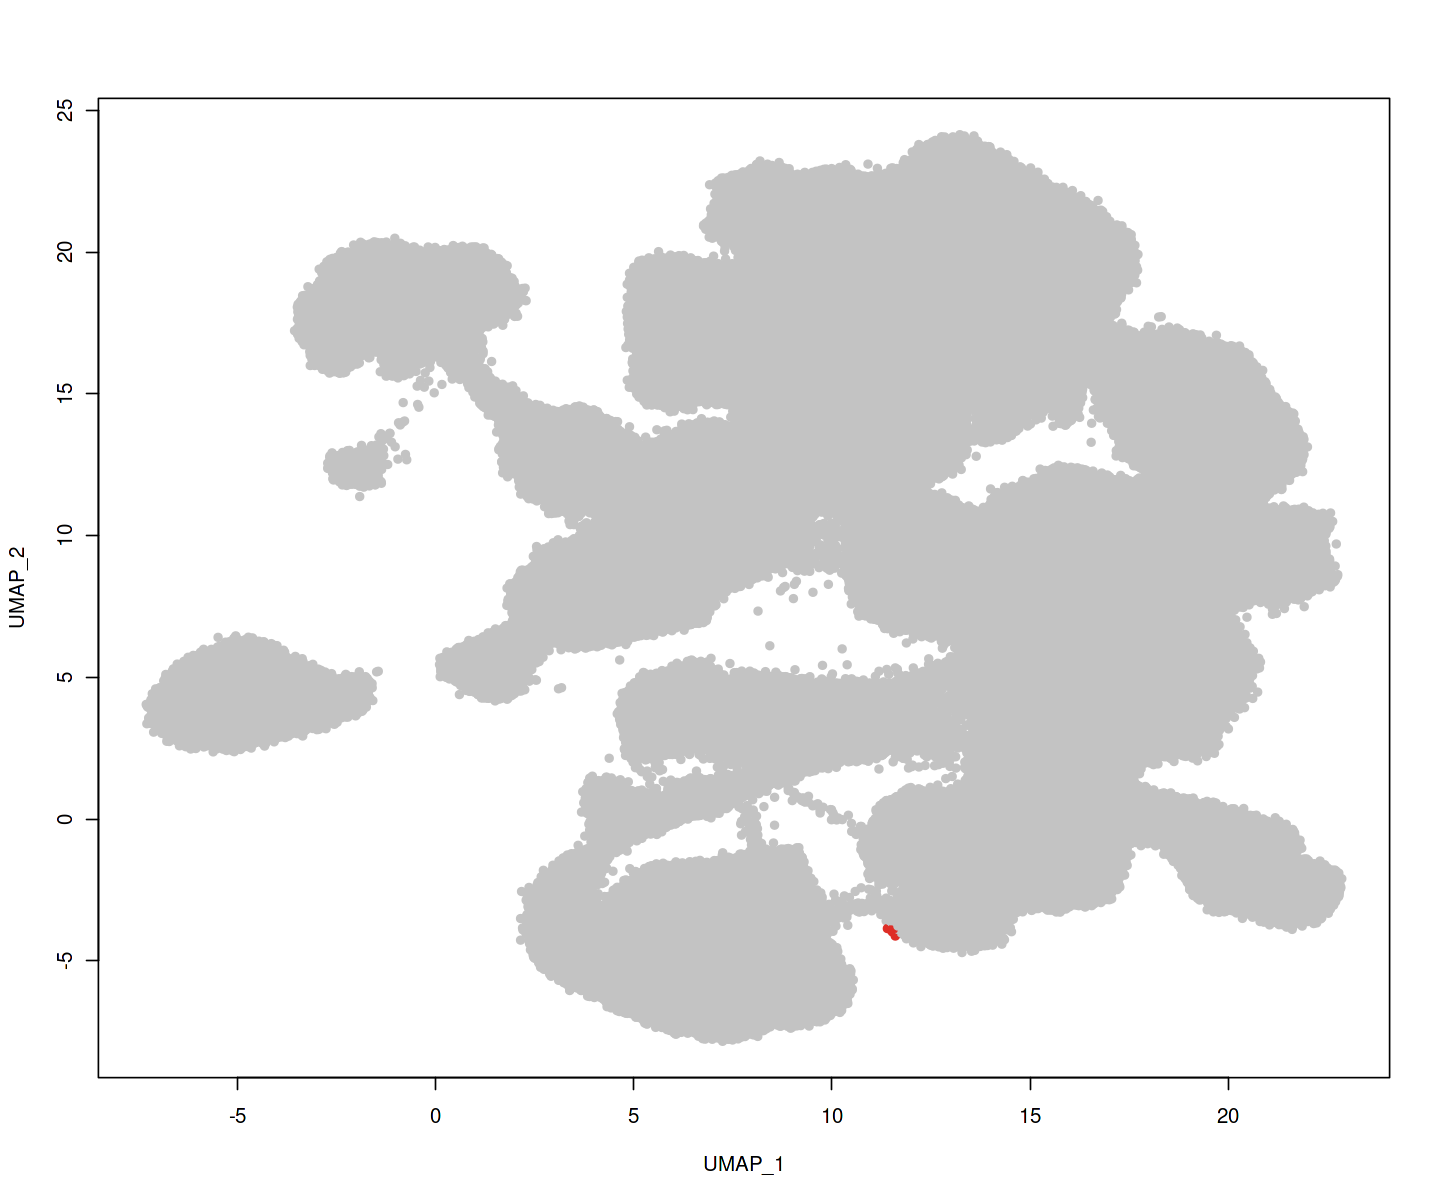

In [35]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "cell_97074"      "cell_99077"      "cell_100402"     "ext_cell_70733" 
 [5] "ext_cell_113479" "ext_cell_114444" "ext_cell_153314" "ext_cell_165404"
 [9] "ext_cell_169313" "ext_cell_174573" "ext_cell_267788" "ext_cell_276575"
[13] "ext_cell_298041"

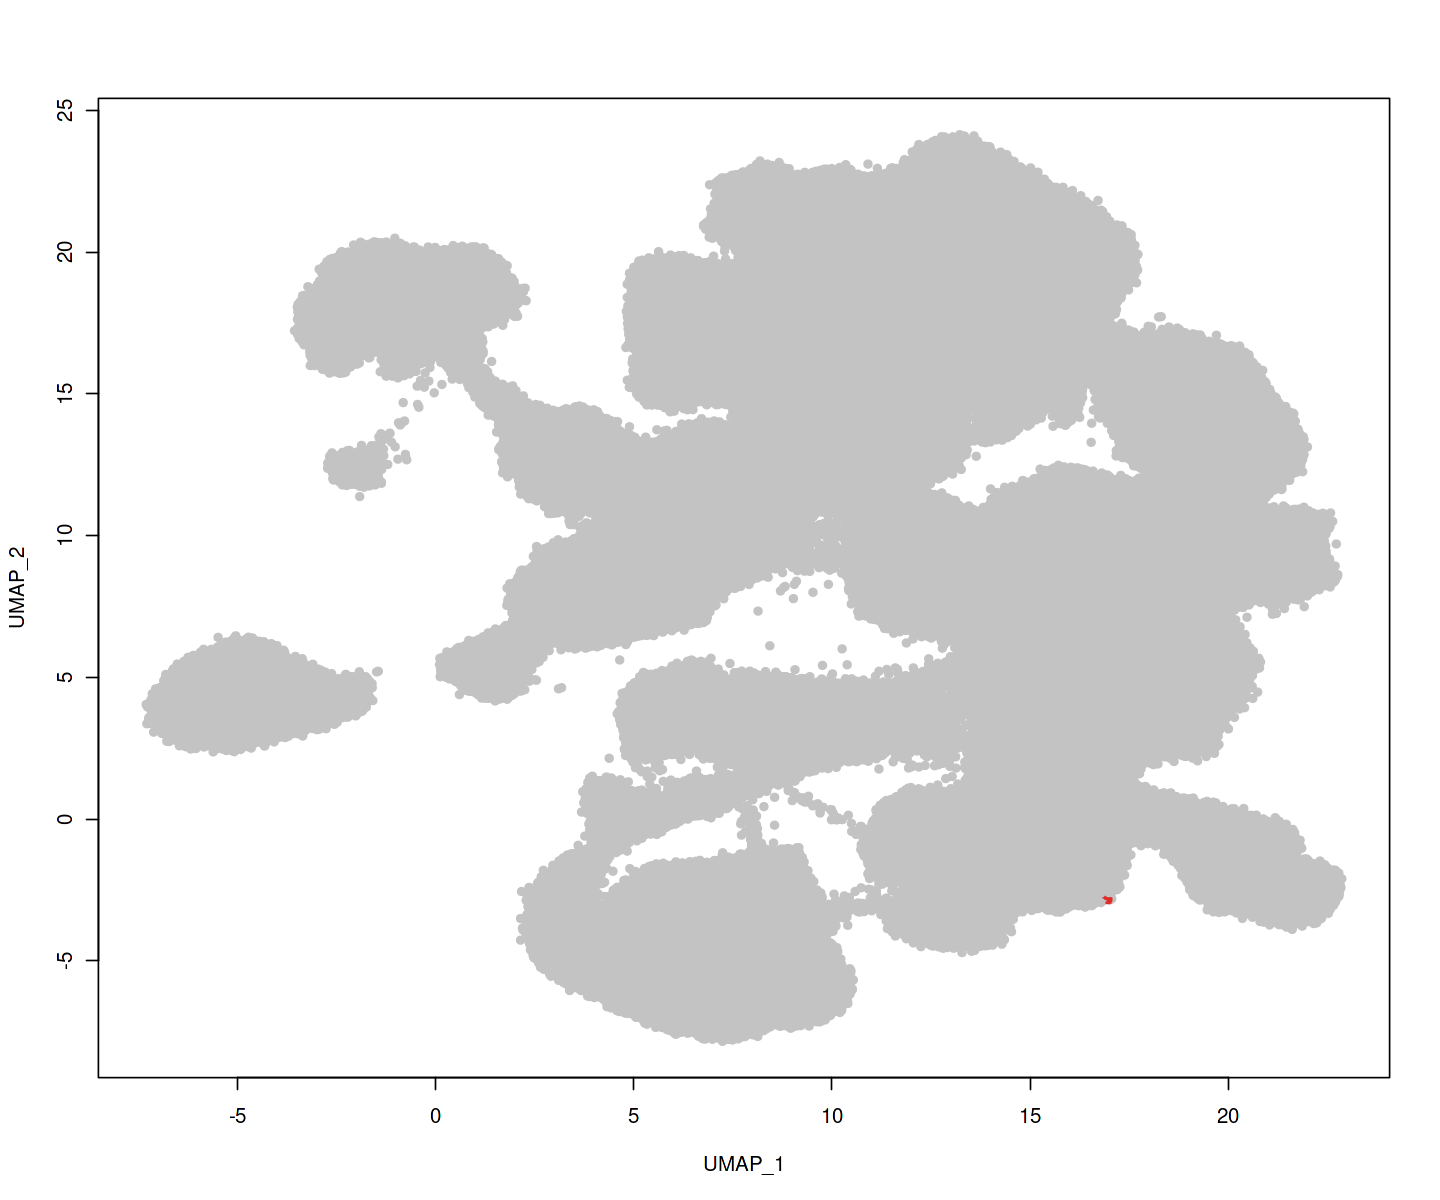

In [36]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_34589"  "ext_cell_35305"  "ext_cell_35313"  "ext_cell_104964"
 [5] "ext_cell_117664" "ext_cell_127943" "ext_cell_241307" "ext_cell_243759"
 [9] "ext_cell_262381" "ext_cell_262666"

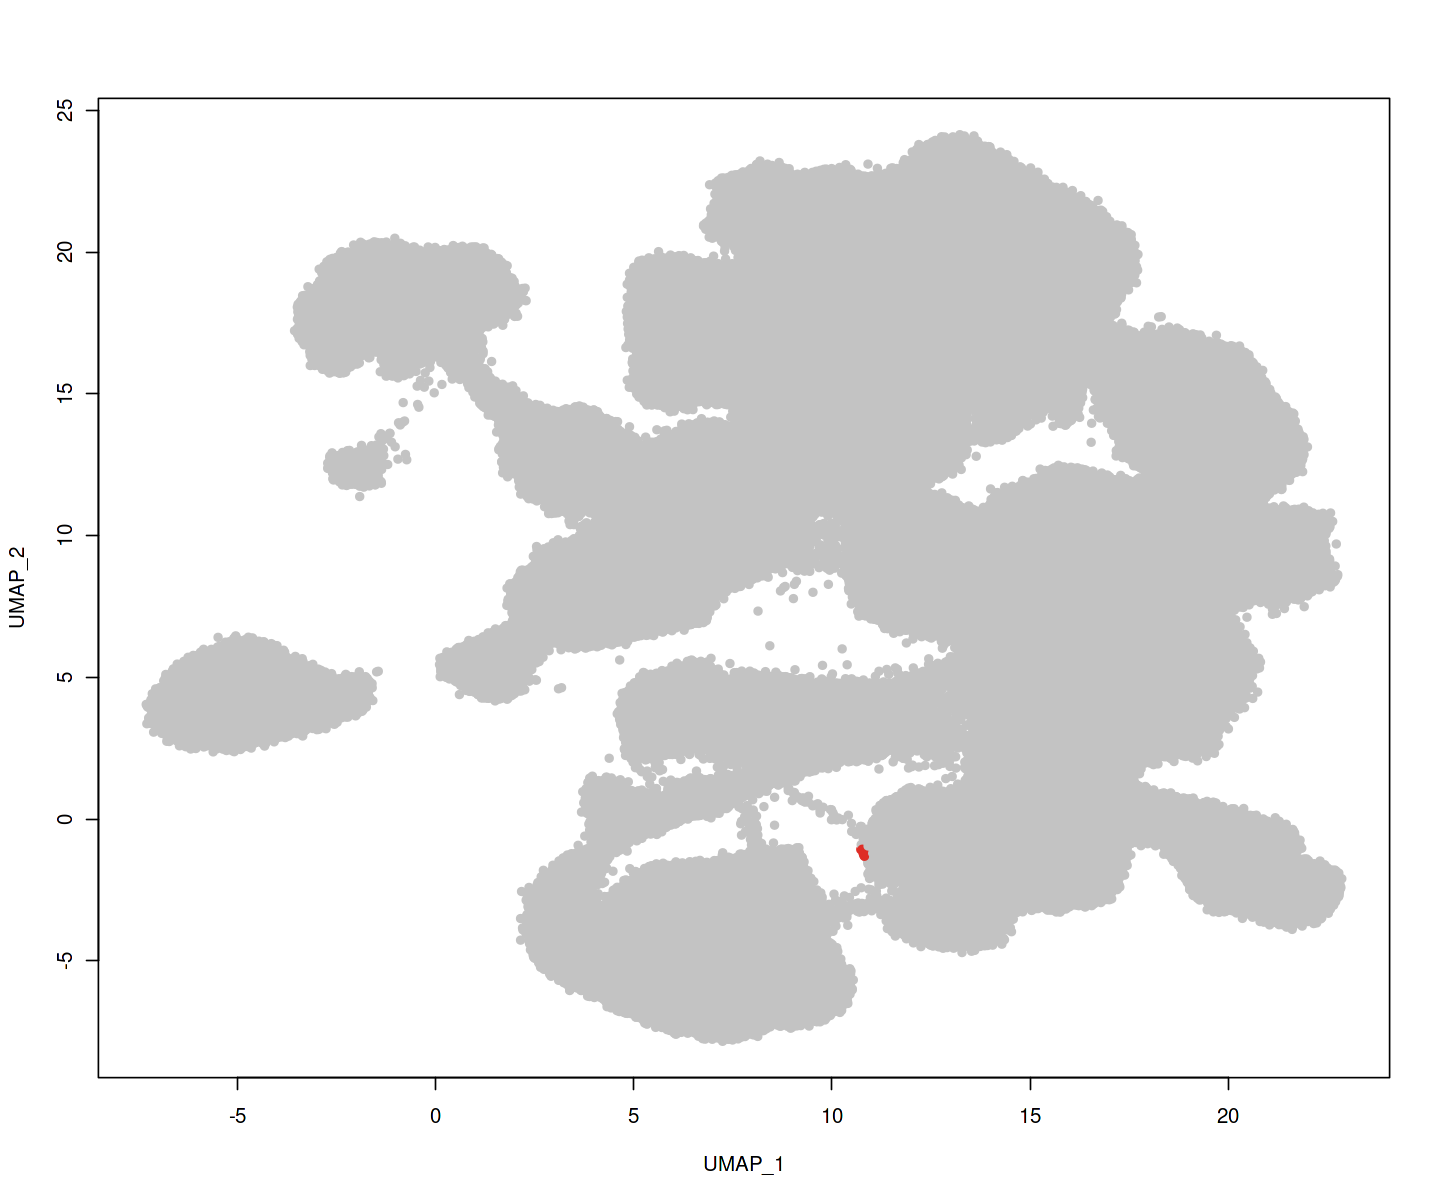

In [37]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_42840"  "ext_cell_54253"  "ext_cell_54281"  "ext_cell_61828" 
 [5] "ext_cell_63520"  "ext_cell_69799"  "ext_cell_80294"  "ext_cell_80991" 
 [9] "ext_cell_87718"  "ext_cell_93567"  "ext_cell_99267"  "ext_cell_123107"
[13] "ext_cell_129531" "ext_cell_132313" "ext_cell_140550" "ext_cell_141332"
[17] "ext_cell_154995"

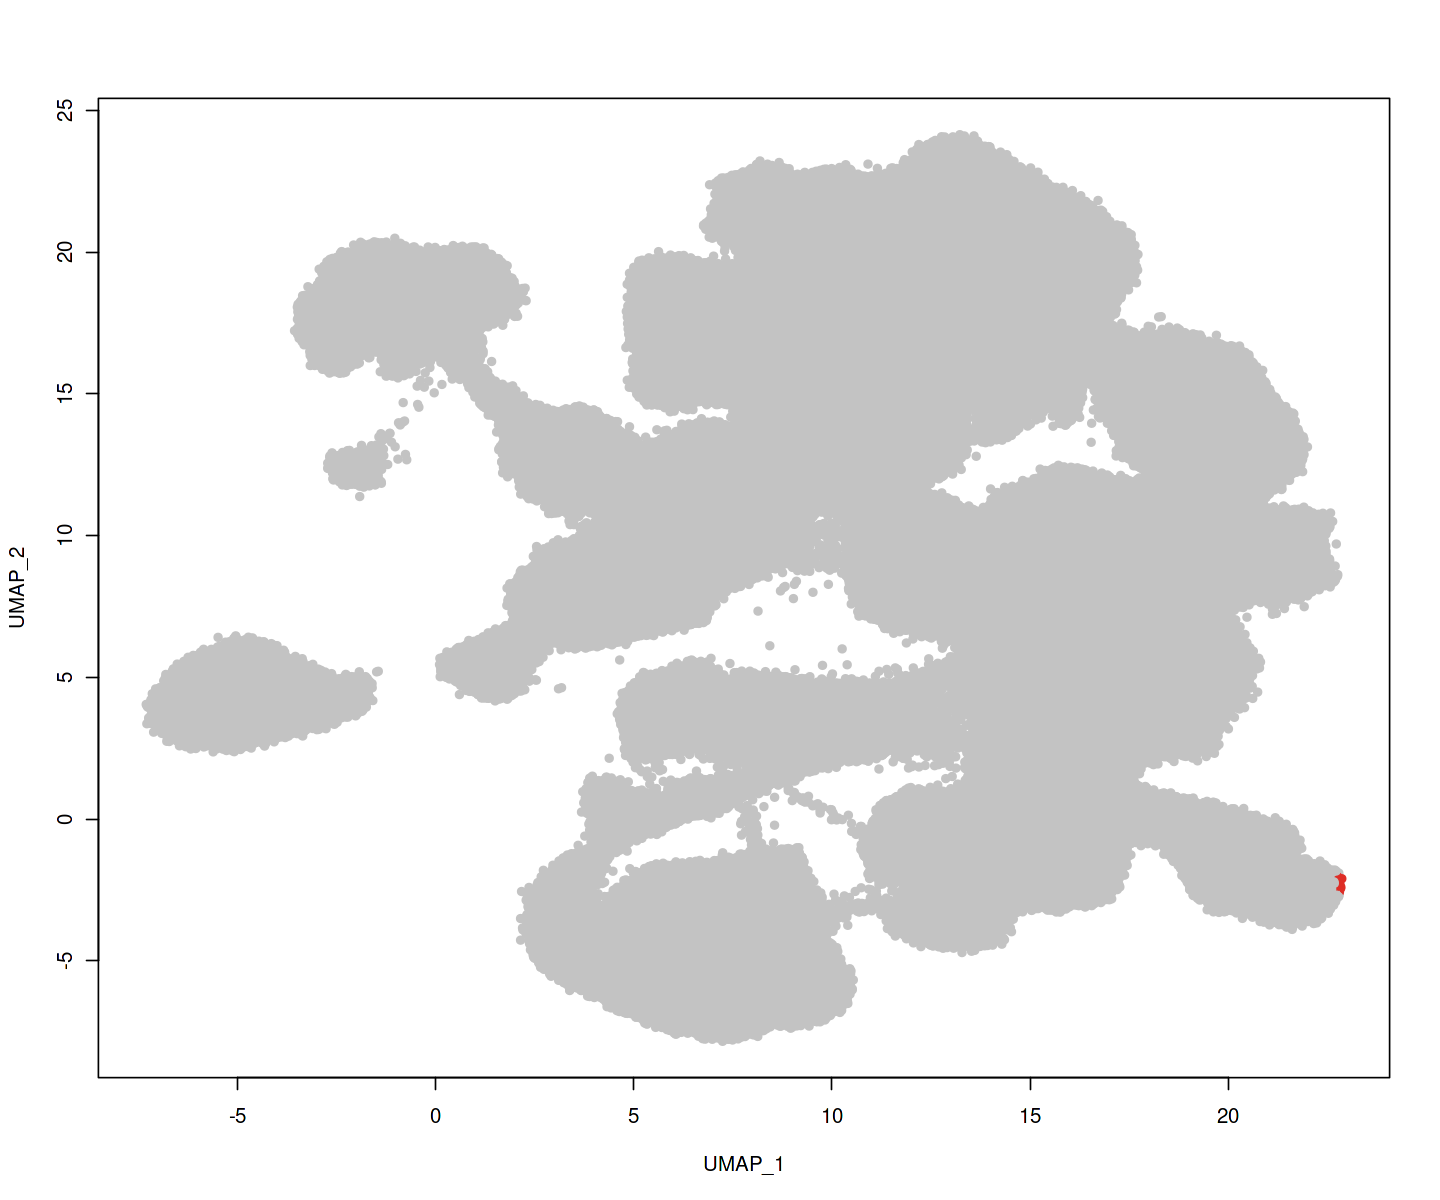

In [38]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_48776"  "ext_cell_54487"  "ext_cell_318387" "ext_cell_322097"

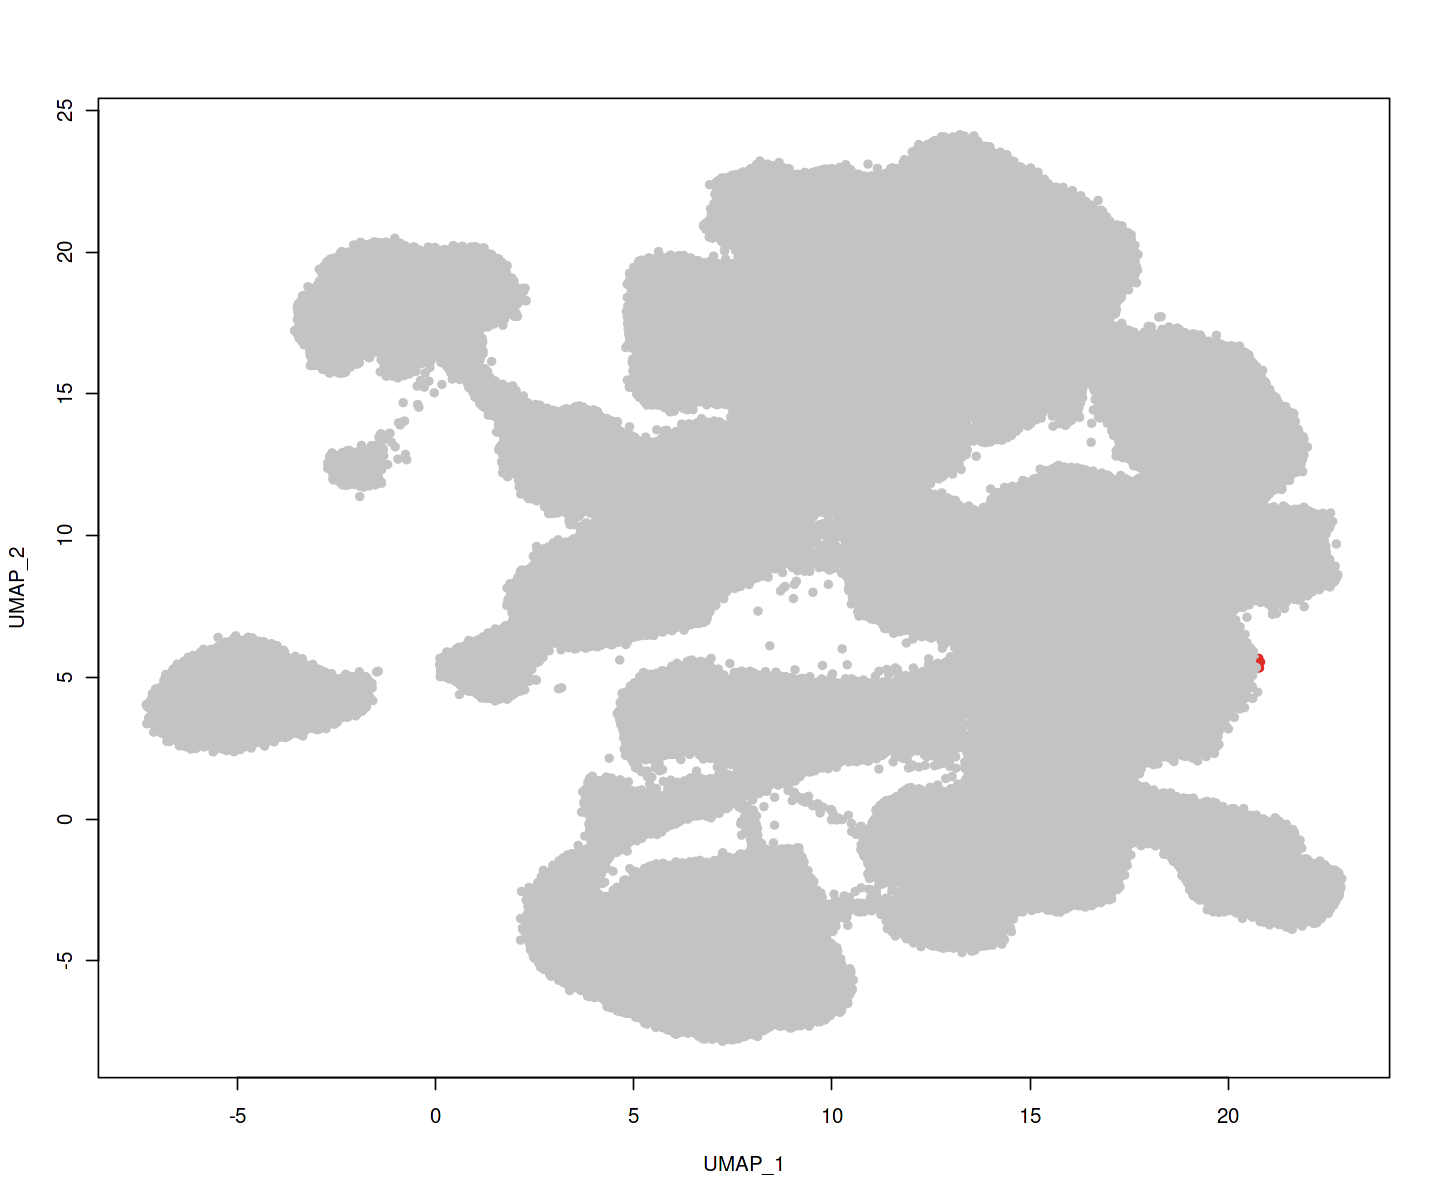

In [39]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_48776"  "ext_cell_54487"  "ext_cell_318387" "ext_cell_322097"

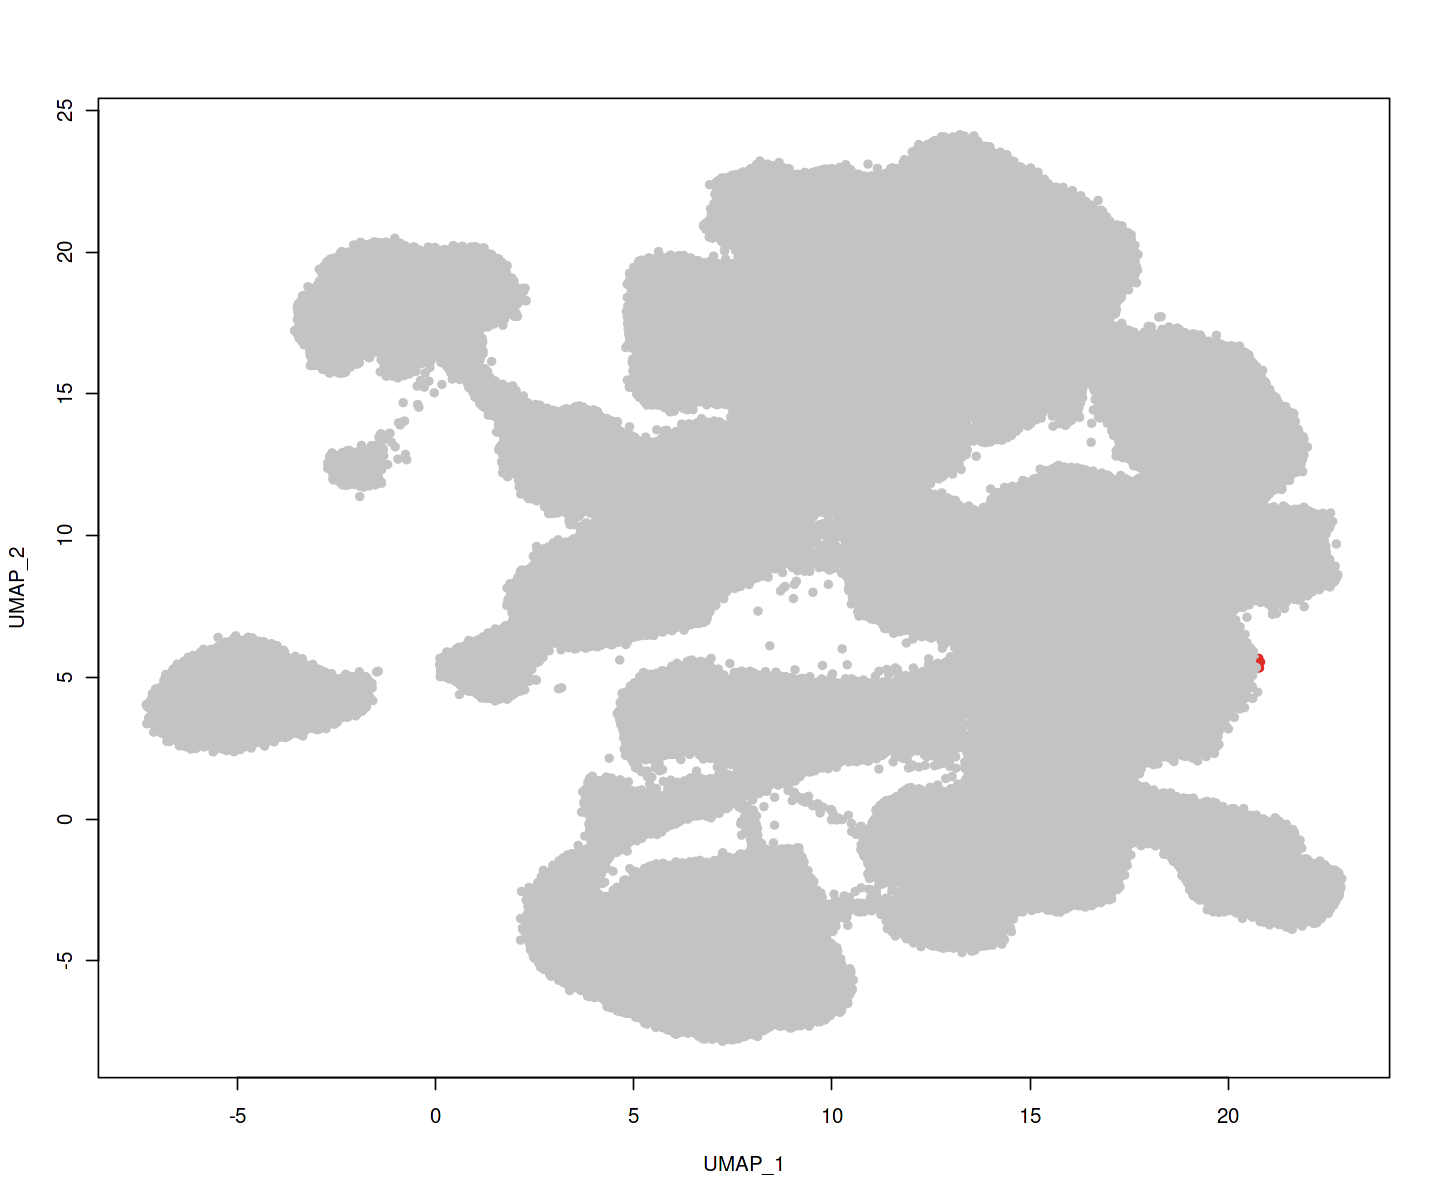

In [40]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_5196"   "ext_cell_206681" "ext_cell_314026"

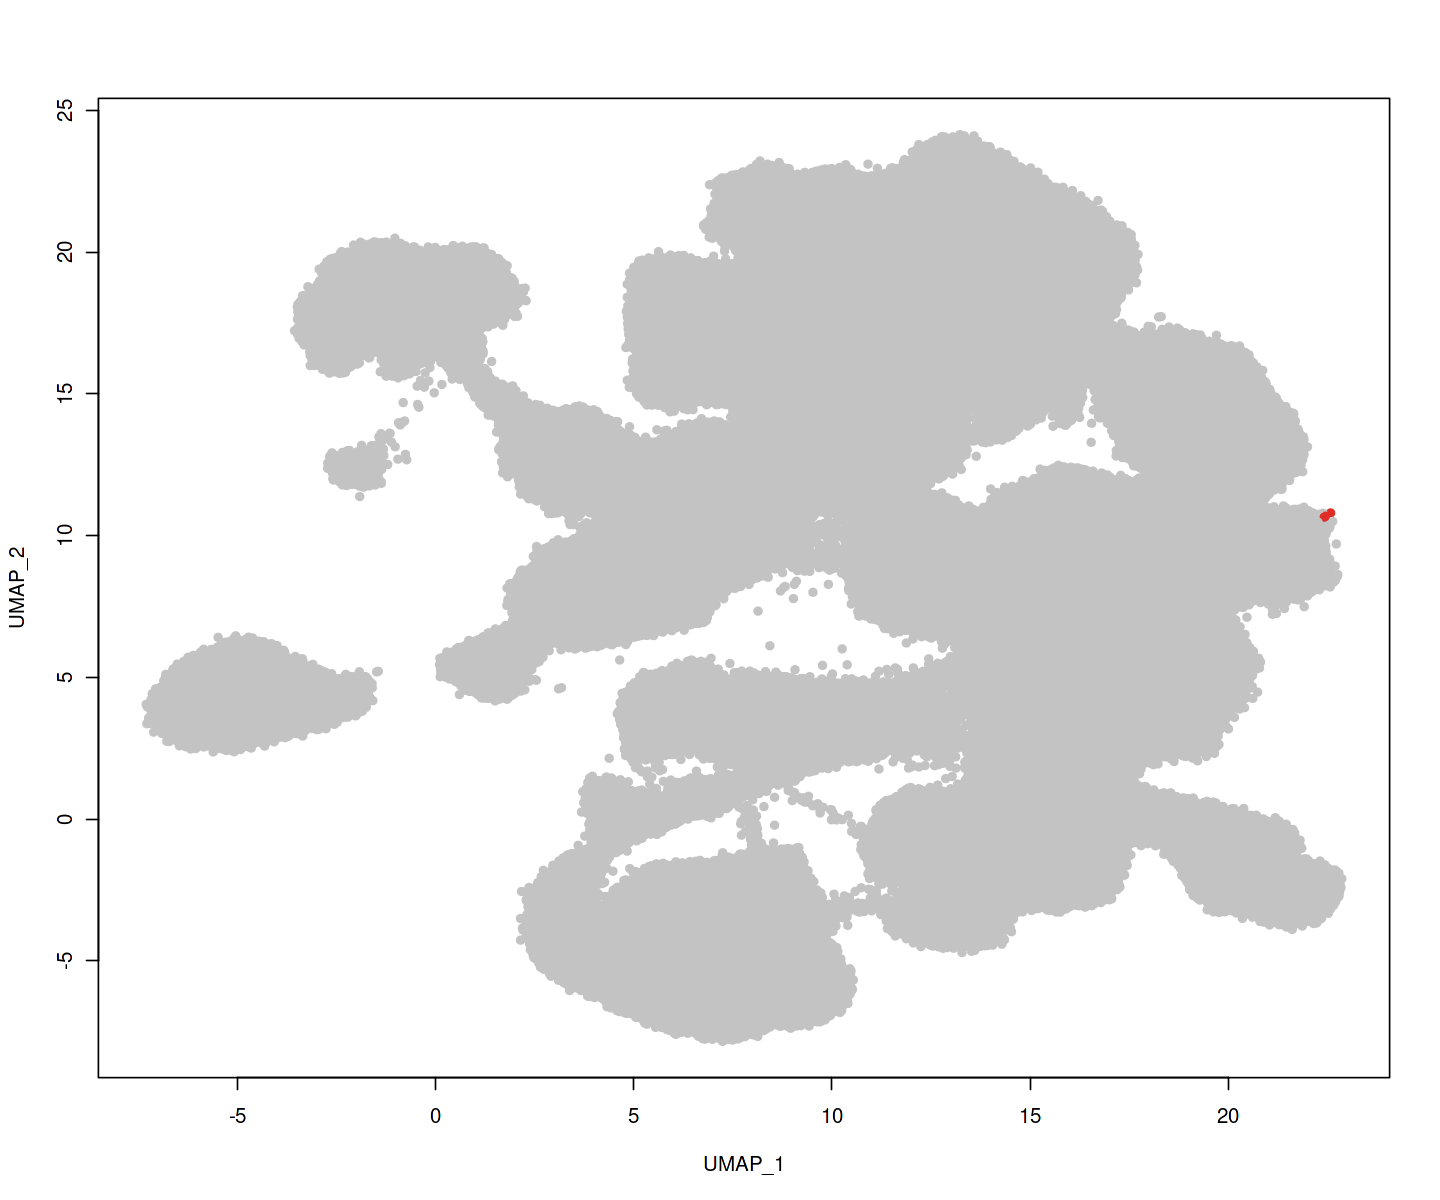

In [41]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "cell_77115"      "ext_cell_38153"  "ext_cell_40110"  "ext_cell_61701" 
 [5] "ext_cell_89697"  "ext_cell_109693" "ext_cell_111250" "ext_cell_121401"
 [9] "ext_cell_123338" "ext_cell_129910" "ext_cell_133495" "ext_cell_137687"
[13] "ext_cell_145126" "ext_cell_321554"

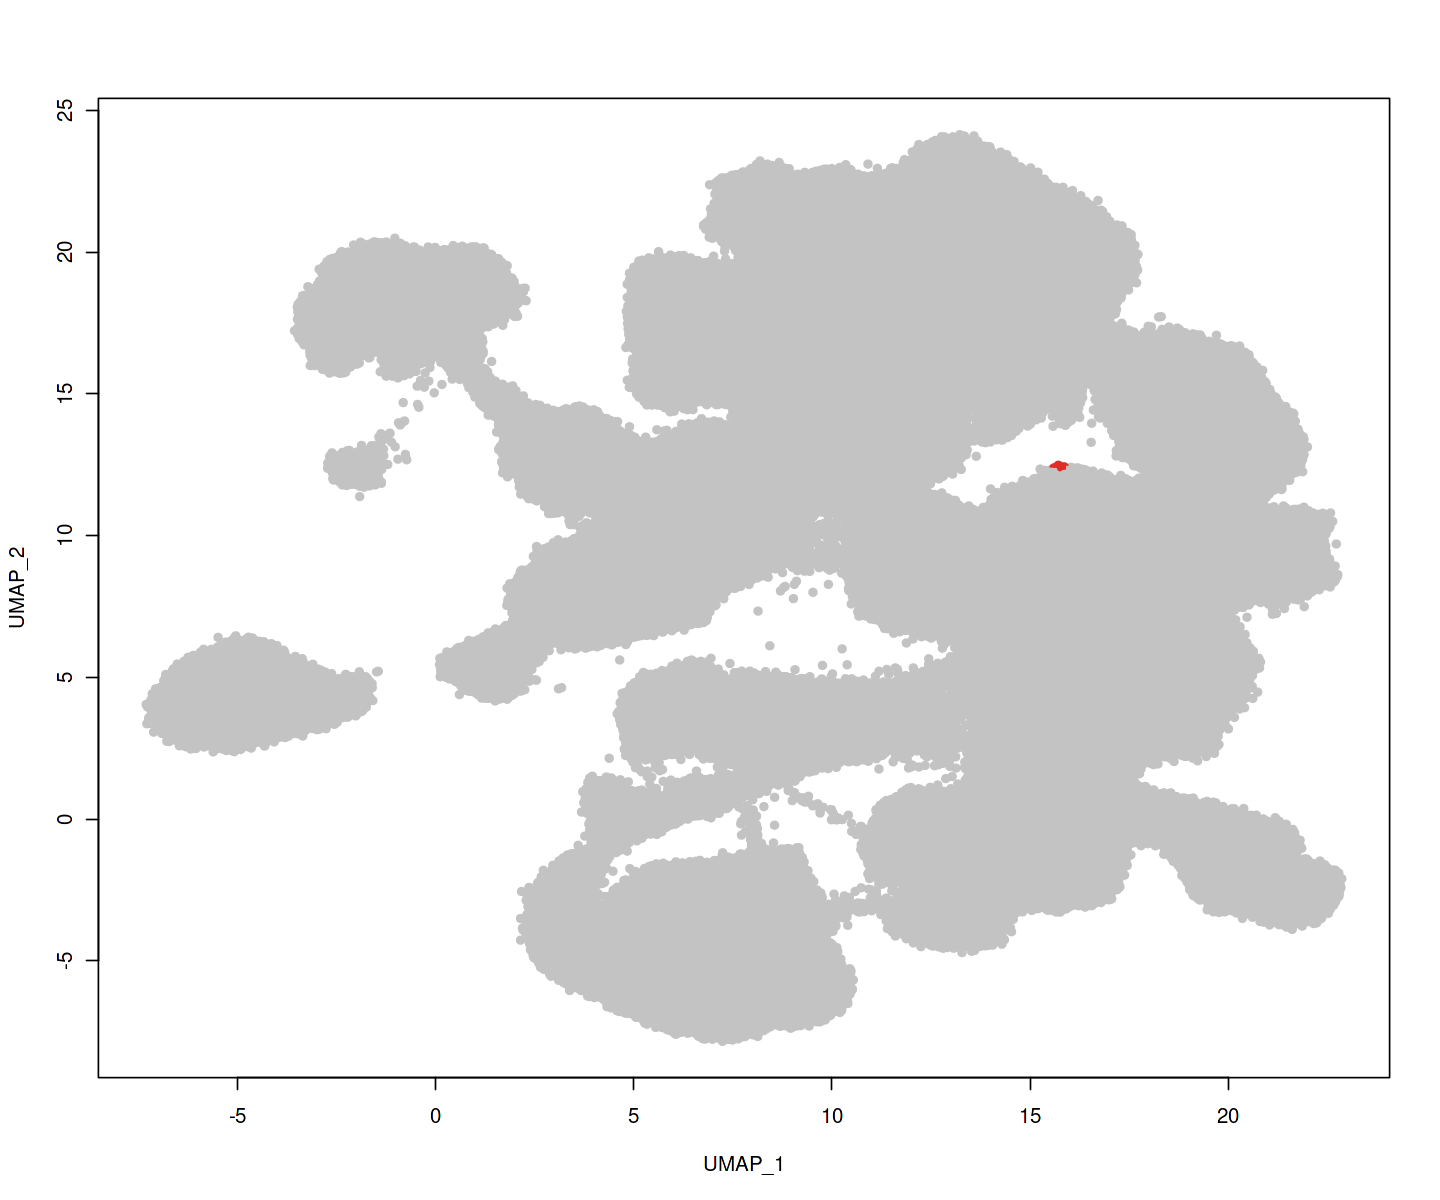

In [42]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "cell_99901"      "cell_103088"     "ext_cell_19216"  "ext_cell_58739" 
 [5] "ext_cell_83049"  "ext_cell_92733"  "ext_cell_103715" "ext_cell_134671"
 [9] "ext_cell_139526" "ext_cell_157771" "ext_cell_160085" "ext_cell_163163"
[13] "ext_cell_165456" "ext_cell_169284" "ext_cell_170252" "ext_cell_172627"
[17] "ext_cell_208659" "ext_cell_273390" "ext_cell_287649" "ext_cell_299865"
[21] "ext_cell_344709"

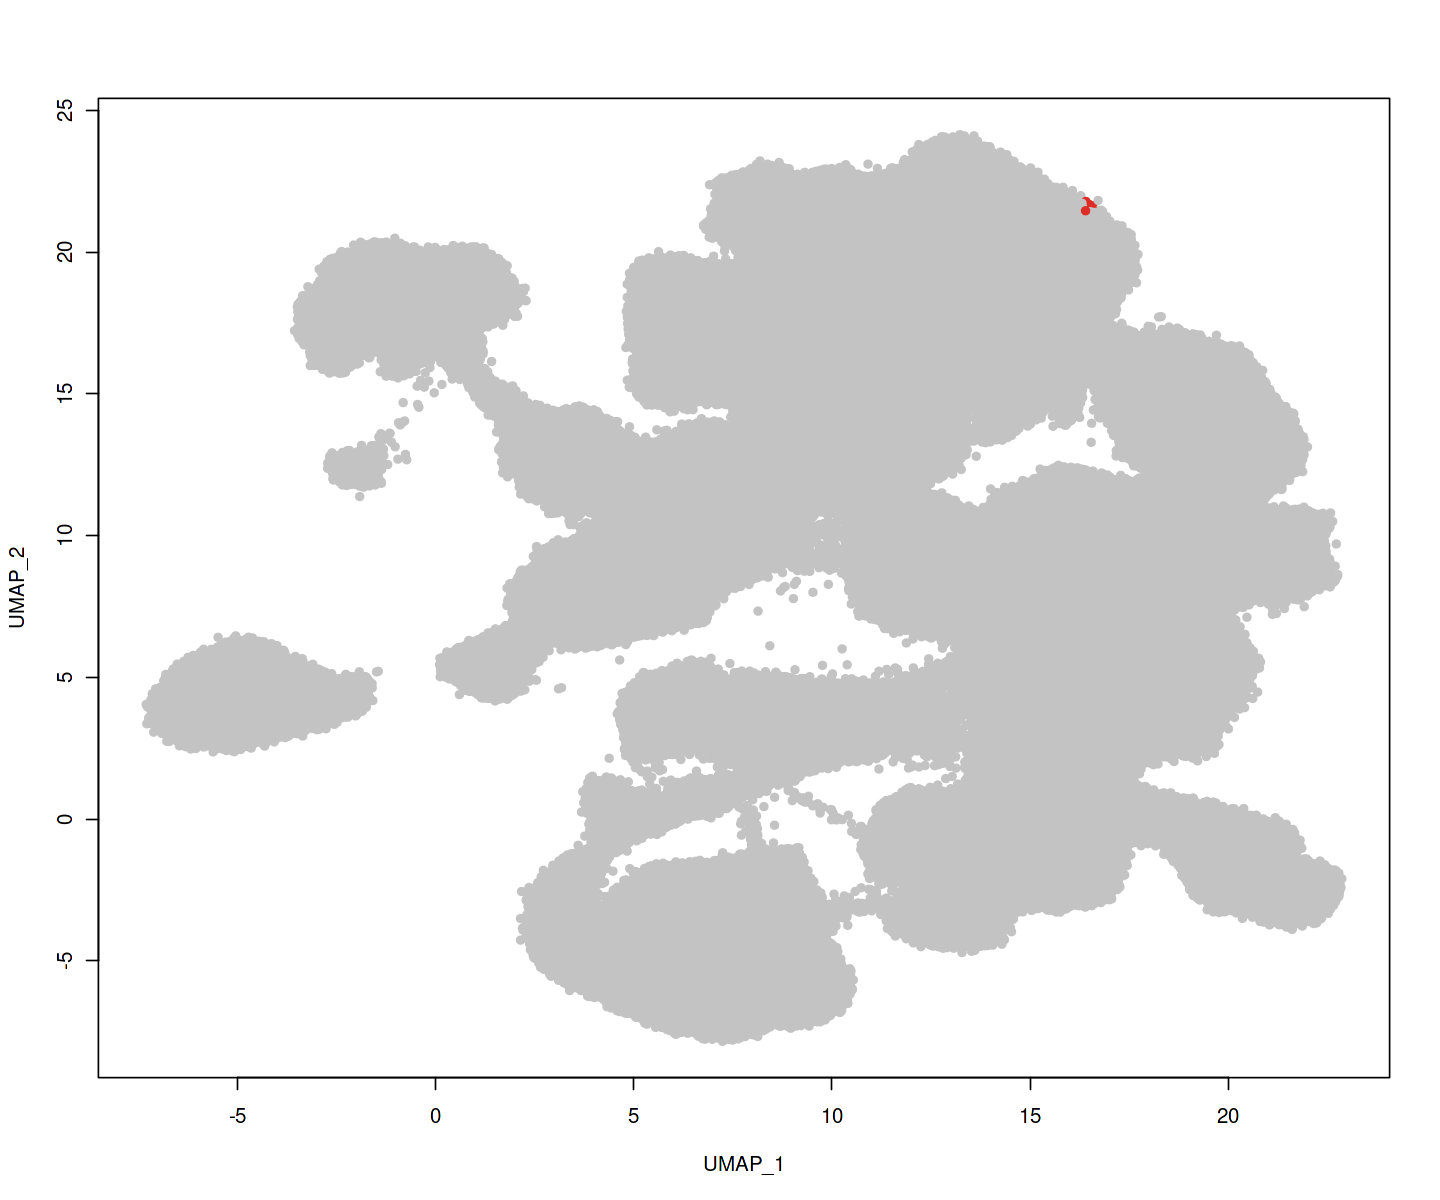

In [43]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "ext_cell_14609"  "ext_cell_47478"  "ext_cell_49188"  "ext_cell_101348"
 [5] "ext_cell_121067" "ext_cell_129132" "ext_cell_137213" "ext_cell_141043"
 [9] "ext_cell_148500" "ext_cell_148898" "ext_cell_153297" "ext_cell_155566"
[13] "ext_cell_165968" "ext_cell_167618" "ext_cell_167845" "ext_cell_168762"
[17] "ext_cell_191536"

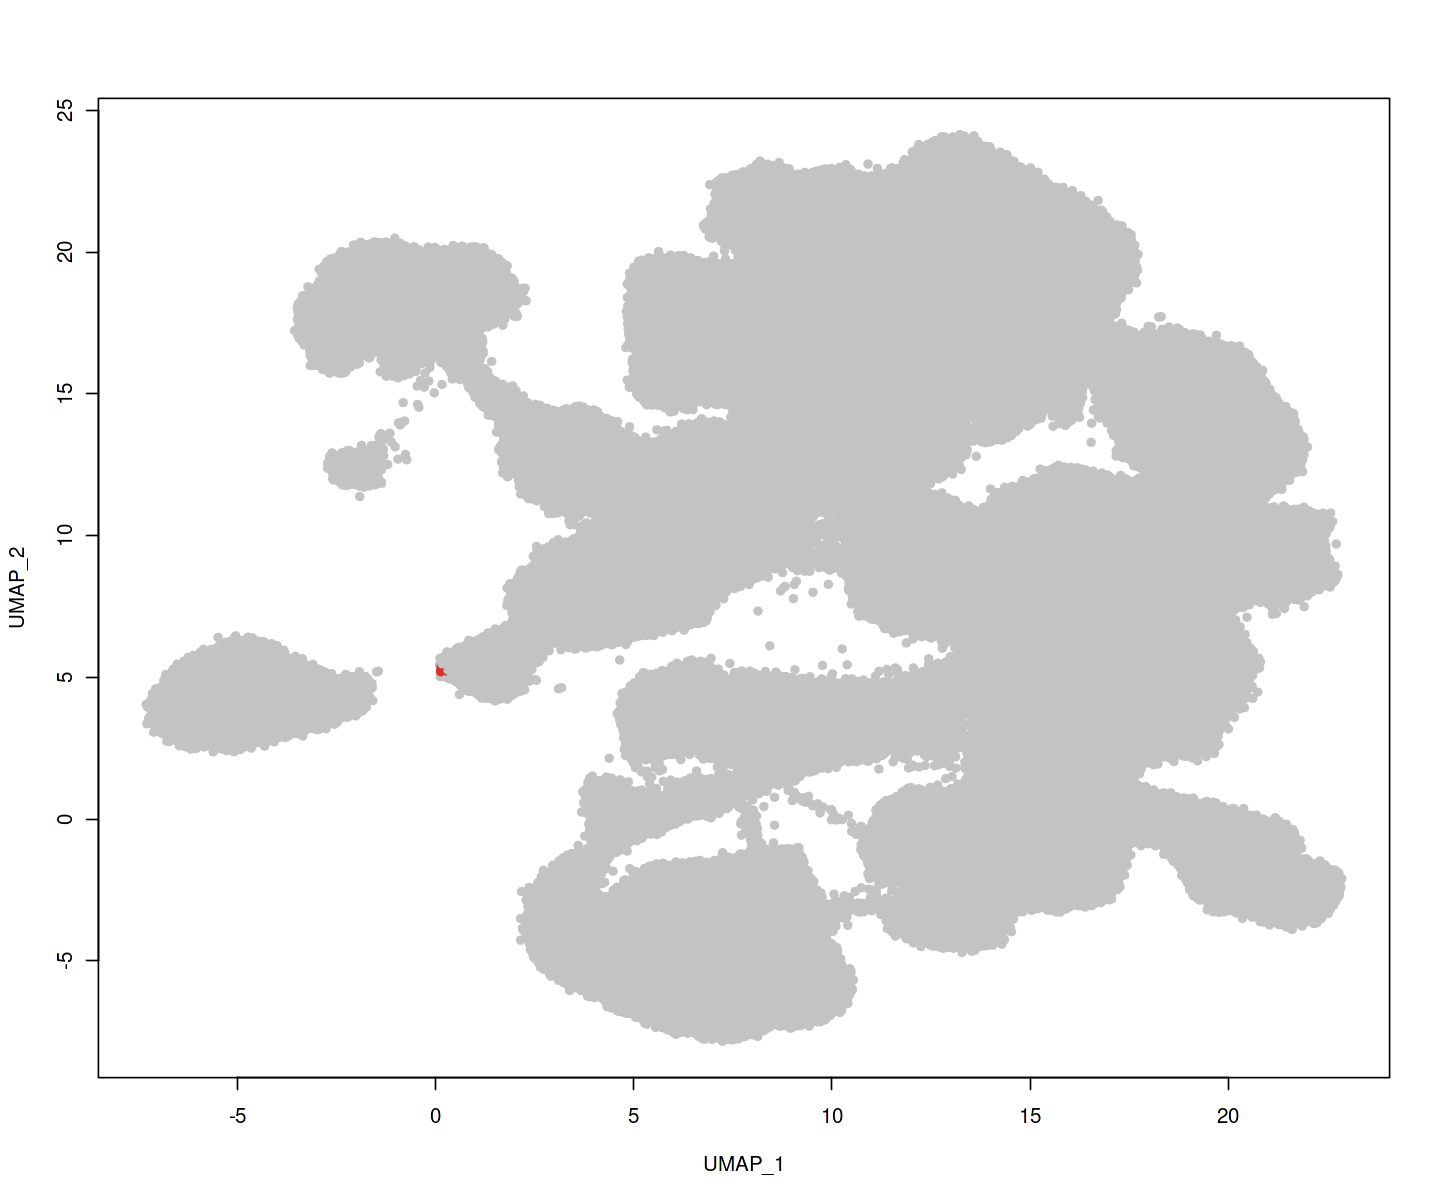

In [44]:
CellSelector(a)


Listening on http://127.0.0.1:5832



[1] "cell_1992"   "cell_6470"   "cell_47507"  "cell_59614"  "cell_77483" 
 [6] "cell_80491"  "cell_90063"  "cell_108406" "cell_109628" "cell_110626"
[11] "cell_112625"

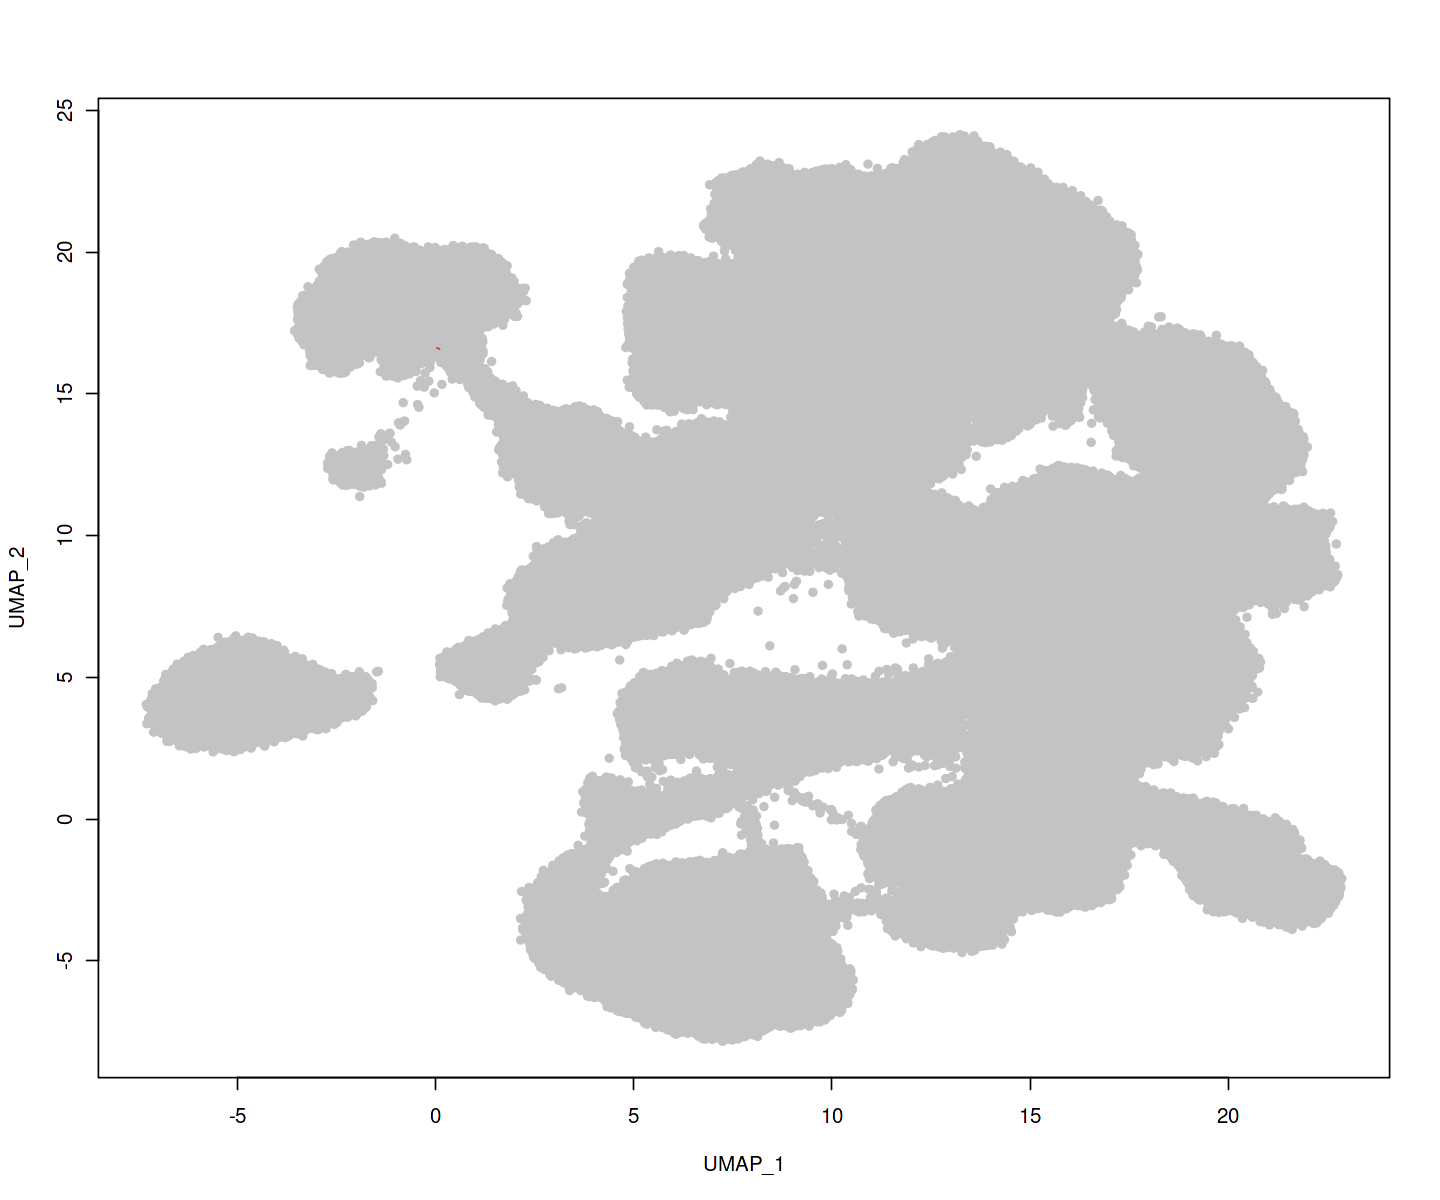

In [45]:
CellSelector(a)

"Epiblast" = 'cell_5669',
"Erythroid" = 'ext_cell_187495',
"MkP" = 'ext_cell_198830',
"YS Endothelium" = 'ext_cell_15342',
"Mesenchyme" = 'ext_cell_30582',
"Allantois" = 'cell_97074',
"YS Mesothelium" = 'ext_cell_34589',
'Cardiomyocytes' = 'ext_cell_42840',
'Limb Mesoderm' = 'ext_cell_48776',
'Cranial Mesoderm' = 'ext_cell_5196',
'Dermomyotome' = 'ext_cell_123338',
'VHBP' = 'ext_cell_139526',
'Amniotic Ectoderm' = 'ext_cell_14609',
'Visceral Endoderm' = 'cell_1992',


# Subsetting

In [47]:
table(obj$Conditions_lv)


 Control   Atf3KO  Bcl6bKO Zfp711KO 
   18366    16404    18948    17389 

In [50]:
Atf3 <- subset(obj, subset = Conditions_lv %in% c('Control','Atf3KO'))
Atf3

An object of class Seurat 
27998 features across 34770 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: OLDPCA, OLDUMAP, OLDTSNE, PCA, UMAP, UMAP3D

In [51]:
Zfp711 <- subset(obj, subset = Conditions_lv %in% c('Control','Zfp711KO'))
Zfp711

An object of class Seurat 
27998 features across 35755 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: OLDPCA, OLDUMAP, OLDTSNE, PCA, UMAP, UMAP3D

In [52]:
Bcl6b <- subset(obj, subset = Conditions_lv %in% c('Control','Bcl6bKO'))
Bcl6b

An object of class Seurat 
27998 features across 37314 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: OLDPCA, OLDUMAP, OLDTSNE, PCA, UMAP, UMAP3D

In [ ]:
export_seurat_to_h5ad <- function(seurat_obj, base_filename, overwrite = TRUE) {
  require(Seurat)
  require(SingleCellExperiment)
  require(SeuratDisk)
  
  # Step 1: Convert Seurat to SingleCellExperiment
  sce <- as.SingleCellExperiment(seurat_obj)
  
  # Step 2: Convert SCE back to Seurat (for SaveH5Seurat compatibility)
  seurat_conv <- as.Seurat(sce)
  
  # Step 3: Save as .h5Seurat
  h5seurat_path <- paste0(base_filename, ".h5Seurat")
  SaveH5Seurat(seurat_conv, filename = h5seurat_path, overwrite = overwrite)
  
  # Step 4: Convert to .h5ad
  Convert(h5seurat_path, dest = "h5ad", overwrite = overwrite)
  
  invisible(NULL)
}

# Example usage:
  #export_seurat_to_h5ad(
  #seurat_obj = script_mesoderm,
  #base_filename = "./rds_files/script_v004_sce_seurat_mesoderm"
  #)

In [6]:
library(SeuratDisk)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [7]:
SaveH5Seurat(obj, filename = './cmov3.h5Seurat')

Creating h5Seurat file for version 3.1.5.9900

Warning message:
"The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the SeuratDisk package.
  Please report the issue at
  <https://github.com/mojaveazure/seurat-disk/issues>."
Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding cell embeddings for OLDPCA

No loadings for OLDPCA

No projected loadings for OLDPCA

No standard deviations for OLDPCA

No JackStraw data for OLDPCA

Adding cell embeddings for OLDUMAP

No loadings for OLDUMAP

No projected loadings for OLDUMAP

No standard deviations for OLDUMAP

No JackStraw data for OLDUMAP

Adding cell embeddings for OLDTSNE

No loadings for OLDTSNE

No projected loadings for OLDTSNE

No standard deviations for OLDTSNE

No JackStraw data for OLDTSNE

Adding cell embeddings for PCA

No loadings for PCA

N

In [8]:
  Convert('./cmov3.h5Seurat', dest = "h5ad", overwrite = overwrite)

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs

Adding dimensional reduction information for OLDPCA

Adding dimensional reduction information for OLDTSNE

Adding dimensional reduction information for OLDUMAP

Adding dimensional reduction information for PCA

Adding dimensional reduction information for UMAP

Adding dimensional reduction information for UMAP3D



In [58]:
SaveH5Seurat(Atf3, filename = './Atf3.h5Seurat')
Convert('./Atf3.h5Seurat', dest = "h5ad", overwrite = overwrite)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding cell embeddings for OLDPCA

No loadings for OLDPCA

No projected loadings for OLDPCA

No standard deviations for OLDPCA

No JackStraw data for OLDPCA

Adding cell embeddings for OLDUMAP

No loadings for OLDUMAP

No projected loadings for OLDUMAP

No standard deviations for OLDUMAP

No JackStraw data for OLDUMAP

Adding cell embeddings for OLDTSNE

No loadings for OLDTSNE

No projected loadings for OLDTSNE

No standard deviations for OLDTSNE

No JackStraw data for OLDTSNE

Adding cell embeddings for PCA

No loadings for PCA

No projected loadings for PCA

No standard deviations for PCA

No JackStraw data for PCA

Adding cell embeddings for UMAP

No loadings for UMAP

No projected loadings for UMAP

No standard deviations for UMAP

No JackStraw data for UMAP

Adding cell embeddings for UMAP3D

No loadings for UMAP3D

In [59]:
SaveH5Seurat(Zfp711, filename = './Zfp711.h5Seurat')
Convert('./Zfp711.h5Seurat', dest = "h5ad", overwrite = overwrite)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding cell embeddings for OLDPCA

No loadings for OLDPCA

No projected loadings for OLDPCA

No standard deviations for OLDPCA

No JackStraw data for OLDPCA

Adding cell embeddings for OLDUMAP

No loadings for OLDUMAP

No projected loadings for OLDUMAP

No standard deviations for OLDUMAP

No JackStraw data for OLDUMAP

Adding cell embeddings for OLDTSNE

No loadings for OLDTSNE

No projected loadings for OLDTSNE

No standard deviations for OLDTSNE

No JackStraw data for OLDTSNE

Adding cell embeddings for PCA

No loadings for PCA

No projected loadings for PCA

No standard deviations for PCA

No JackStraw data for PCA

Adding cell embeddings for UMAP

No loadings for UMAP

No projected loadings for UMAP

No standard deviations for UMAP

No JackStraw data for UMAP

Adding cell embeddings for UMAP3D

No loadings for UMAP3D

In [60]:
SaveH5Seurat(Bcl6b, filename = './Bcl6b.h5Seurat')
Convert('./Bcl6b.h5Seurat', dest = "h5ad", overwrite = overwrite)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding cell embeddings for OLDPCA

No loadings for OLDPCA

No projected loadings for OLDPCA

No standard deviations for OLDPCA

No JackStraw data for OLDPCA

Adding cell embeddings for OLDUMAP

No loadings for OLDUMAP

No projected loadings for OLDUMAP

No standard deviations for OLDUMAP

No JackStraw data for OLDUMAP

Adding cell embeddings for OLDTSNE

No loadings for OLDTSNE

No projected loadings for OLDTSNE

No standard deviations for OLDTSNE

No JackStraw data for OLDTSNE

Adding cell embeddings for PCA

No loadings for PCA

No projected loadings for PCA

No standard deviations for PCA

No JackStraw data for PCA

Adding cell embeddings for UMAP

No loadings for UMAP

No projected loadings for UMAP

No standard deviations for UMAP

No JackStraw data for UMAP

Adding cell embeddings for UMAP3D

No loadings for UMAP3D

In [9]:
SaveH5Seurat(atlas, filename = './atlas.h5Seurat')
Convert('./atlas.h5Seurat', dest = "h5ad", overwrite = overwrite)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for originalexp

Adding data for originalexp

No variable features found for originalexp

Adding feature-level metadata for originalexp

Adding cell embeddings for UMAP

No loadings for UMAP

No projected loadings for UMAP

No standard deviations for UMAP

No JackStraw data for UMAP

Adding cell embeddings for PCA

No loadings for PCA

No projected loadings for PCA

No standard deviations for PCA

No JackStraw data for PCA

Validating h5Seurat file

Adding data from originalexp as X

Transfering meta.features to var

Adding counts from originalexp as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for PCA

Adding dimensional reduction information for UMAP



In [10]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Debian GNU/Linux 12 (bookworm)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.21.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Amsterdam
tzcode source: system (glibc)

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] SeuratDisk_0.0.0.9021       future.apply_1.20.0        
 [3] future_1.58.0               argparse_2.2.5             
 [5] stringr